In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

sns.set_theme(style='whitegrid')

In [ ]:
tests_to_check = ['test2', 'test4', 'test6', 'test7', 'test9', 'test10', 'test11', 'test12']
bebics = ('BEBIC_B', 'BEBIC_C')
exp_lists = (["B3", "B4", "B5", "B6"], ["C3", "C5", "C6"])
CpG_tests = ['test2', 'test6']
AGG_tests = ['test4', 'test7']
C_tests = ['test9', 'test10']
A_tests = ['test11', 'test12']
BEBIC_B_tests = ['test2', 'test4', 'test9', 'test11']
BEBIC_C_tests = ['test6', 'test7', 'test10', 'test12']

ad = "/external/analyses/lucy/bebic_pipeline"

dmr_segments_header = ["chrom","start","end","state_name","score","N_sites","samplea_counts","sampleb_counts","samplea_percents","sampleb_percents","samplea_fraction_modified","sampleb_fraction_modified","effect_size"]

################# Set up stuff #################
chr_names = [
    "chr1", "chr2", "chr3", "chr4", "chr5",
    "chr6", "chr7", "chr8", "chr9", "chr10",
    "chr11", "chr12", "chr13", "chr14", "chr15",
    "chr16", "chr17", "chr18", "chr19", "chr20",
    "chr21", "chr22", "chrX", "chrY", "chrM"
]

colour_mapping = {
    "B3_Control": "#e67f27", # Add more samples with colors as needed
    "B3_Test": "#e67f2780", # Example for additional samples
    "B4_Control": "#ae0056", # Add more samples with colors as needed
    "B4_Test": "#ae005680", # Example for additional samples
    "B5_Control": "#00740f", # Add more samples with colors as needed
    "B5_Test": "#00740f80", # Example for additional samples
    "B6_Control": "#68afff", # Add more samples with colors as needed
    "B6_Test": "#68afff80", # Example for additional samples
    "C3_Control": "#e67f27",
    "C3_Test": "#e67f2780",
    "C5_Control": "#00740f",
    "C5_Test": "#00740f80",
    "C6_Control": "#68afff",
    "C6_Test": "#68afff80"
}

In [ ]:
# Functions

def get_sample_names(exp_list):
    sample_names_list = list()
    for exp in exp_list:
        for var in ["Control", "Test"]:
            sample_name = exp + "_" + var
            sample_names_list.append(sample_name)
    return sample_names_list


def get_df_of_DMRs(path2_dmrs, bebic):
    dmr_all_chrs_df = pd.DataFrame()
    for chr_name in chr_names:
        path2dmr = os.path.join(path2_dmrs, f'raw_DMRs.{bebic}.{chr_name}.bed')
        
        if not os.path.exists(path2dmr):
            # print(f'{path2dmr} does not exist')
            continue

        try:
            dmr_df = pd.read_csv(path2dmr, sep='\t', names=dmr_segments_header)
        except Exception as e:
            print(f"File {path2dmr} did not load => {e}")
            continue

        # Filter to just different regions
        dmr_df = dmr_df[dmr_df['state_name'] == "different"]

        # Add column for genome browser coords and set as index
        dmr_df.insert(3, "location", dmr_df["chrom"] + ":" + dmr_df["start"].astype(str) + "-" + dmr_df["end"].astype(str))
        dmr_df.set_index(dmr_df['location'], inplace=True, drop=True)
        
        # Concatenate the dataframes
        dmr_all_chrs_df = pd.concat([dmr_all_chrs_df, dmr_df])
    return dmr_all_chrs_df

In [ ]:
whole_DMR_df = pd.DataFrame()
for name_of_test in tests_to_check:
    
    # Set up variables 
    if name_of_test in BEBIC_B_tests:
        bebic = 'BEBIC_B'
        exp_list = exp_lists[0]
    elif name_of_test in BEBIC_C_tests:
        bebic = 'BEBIC_C'
        exp_list = exp_lists[1]
    else:
        raise ValueError('test not associated with a bebic')
    if name_of_test in CpG_tests:
        modBase = 'C'
        motif = 'CpG'
    elif name_of_test in AGG_tests:
        modBase = 'A'
        motif = 'AGG'
    elif name_of_test in C_tests:
        modBase = 'C'
        motif = 'C'
    elif name_of_test in A_tests:
        modBase = 'A'
        motif = 'A'
    else:
        raise ValueError('test not associated with a motif')
    
    # Set up paths
    plotting_dir = os.path.join(
        "/home/dejlu879/20240731-BEBIC_dmr", f"pipeline_{name_of_test}", "plots")
    int_data = os.path.join(
        ad, name_of_test, "intermediate_data_files")
    path2results = os.path.join(ad, name_of_test, "modkit")
    path2_dmrs = os.path.join(path2results, "all_test")
    sigDMR_fp = os.path.join(int_data, f"sig_DMRs.{bebic}.modkit.csv")
    
    # Get the list of sampels
    sample_names_list = get_sample_names(exp_list)
    
    # Get dataframe of different areas
    dmr_all_chrs_df = get_df_of_DMRs(path2_dmrs, bebic)
    dmr_all_chrs_df['testID'] = name_of_test
    dmr_all_chrs_df['test_description'] = f'{bebic}: {modBase} of {motif}'
    if bebic == 'BEBIC_B':
        dmr_all_chrs_df['cell line'] = 'SW780'
    else:
        dmr_all_chrs_df['cell line'] = 'RT4'
        
    
    if len(dmr_all_chrs_df) > 0:
        if len(whole_DMR_df) > 0:
            whole_DMR_df = pd.concat([whole_DMR_df, dmr_all_chrs_df])
        else:
            whole_DMR_df = dmr_all_chrs_df
    
        # print dmr df
        print(f"{name_of_test}: {bebic}, {motif}")
        display(dmr_all_chrs_df)
        print("")
    
whole_DMR_df

test2: BEBIC_B, CpG


,chrom,start,end,location,state_name,score,N_sites,samplea_counts,sampleb_counts,samplea_percents,sampleb_percents,samplea_fraction_modified,sampleb_fraction_modified,effect_size,testID,test_description,cell line
location,,,,,,,,,,,,,,,,,
chr1:10182679-10182749,chr1,10182679,10182749,chr1:10182679-10182749,different,568.838887,18,m:676,m:739,m:30.94,m:96.22,0.309382,0.962240,-0.652857,test2,BEBIC_B: C of CpG,SW780
chr1:69193116-69193117,chr1,69193116,69193117,chr1:69193116-69193117,different,16.650137,1,m:28,m:5,m:96.55,m:22.73,0.965517,0.227273,0.738244,test2,BEBIC_B: C of CpG,SW780
chr1:235312394-235312422,chr1,235312394,235312422,chr1:235312394-235312422,different,118.520283,10,m:664,m:794,m:28.49,m:53.40,0.284856,0.533961,-0.249105,test2,BEBIC_B: C of CpG,SW780
chrX:47736633-47736649,chrX,47736633,47736649,chrX:47736633-47736649,different,30.956779,3,m:12,m:56,m:16.44,m:80.00,0.164384,0.800000,-0.635616,test2,BEBIC_B: C of CpG,SW780



test6: BEBIC_C, CpG


,chrom,start,end,location,state_name,score,N_sites,samplea_counts,sampleb_counts,samplea_percents,sampleb_percents,samplea_fraction_modified,sampleb_fraction_modified,effect_size,testID,test_description,cell line
location,,,,,,,,,,,,,,,,,
chr1:235312391-235312422,chr1,235312391,235312422,chr1:235312391-235312422,different,140.446478,9,m:169,m:354,m:86.22,m:25.04,0.862245,0.250354,0.611891,test6,BEBIC_C: C of CpG,RT4


,chrom,start,end,location,state_name,score,N_sites,samplea_counts,sampleb_counts,samplea_percents,sampleb_percents,samplea_fraction_modified,sampleb_fraction_modified,effect_size,testID,test_description,cell line
location,,,,,,,,,,,,,,,,,
chr1:10182679-10182749,chr1,10182679,10182749,chr1:10182679-10182749,different,568.838887,18,m:676,m:739,m:30.94,m:96.22,0.309382,0.962240,-0.652857,test2,BEBIC_B: C of CpG,SW780
chr1:69193116-69193117,chr1,69193116,69193117,chr1:69193116-69193117,different,16.650137,1,m:28,m:5,m:96.55,m:22.73,0.965517,0.227273,0.738244,test2,BEBIC_B: C of CpG,SW780
chr1:235312394-235312422,chr1,235312394,235312422,chr1:235312394-235312422,different,118.520283,10,m:664,m:794,m:28.49,m:53.40,0.284856,0.533961,-0.249105,test2,BEBIC_B: C of CpG,SW780
chrX:47736633-47736649,chrX,47736633,47736649,chrX:47736633-47736649,different,30.956779,3,m:12,m:56,m:16.44,m:80.00,0.164384,0.800000,-0.635616,test2,BEBIC_B: C of CpG,SW780
chr1:235312391-235312422,chr1,235312391,235312422,chr1:235312391-235312422,different,140.446478,9,m:169,m:354,m:86.22,m:25.04,0.862245,0.250354,0.611891,test6,BEBIC_C: C of CpG,RT4


Located in csv file: `/home/dejlu879/20240731-BEBIC_dmr/all_DMRs.csv`

# Annotate

In [ ]:
library("GenomicRanges")
library("data.table")
library("AnnotationHub")
library("GenomicFeatures")
library("dplyr")
library("stringr")
library(org.Hs.eg.db)

Loading required package: stats4

Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb


Attaching package: ‘data.table’


The following object is masked from ‘package:GenomicRanges’:

    shift


The fo

In [ ]:
ad = "/external/analyses/lucy/bebic_pipeline"

get_gene_info <- function(subject_idx, keytype) {
    
    geneids = genes_txdb$gene_id[subject_idx]
    # gene_symbols <- mapIds(org.Hs.eg.db, keys = geneids, column = "SYMBOL", keytype = "SYMBOL")
    
    # Sometimes it can't find any gene descriptions 
    result <- try({
        gene_descriptions <- mapIds(org.Hs.eg.db, keys = geneids, column = "GENENAME", keytype = keytype)
    }, silent = TRUE)

    # Check if an error occurred
    if (inherits(result, "try-error")) {
        print("No entries found, making an empty dataframe")
        # Create a dataframe with gene IDs, symbols, and descriptions
        gene_info <- data.frame(
            Symbol = geneids,
            EntrezID = rep(NA, length(subject_idx)),
            Description = rep(NA, length(subject_idx))
        )
    } else {
        print("Success")
        gene_entrez <- mapIds(org.Hs.eg.db, keys = geneids, column = "ENTREZID", keytype = keytype)
        # Create a dataframe with gene IDs, symbols, and descriptions
        gene_info <- data.frame(
            Symbol = geneids,
            EntrezID = gene_entrez,
            Description = gene_descriptions
        )
    }

    gene_info <- gene_info %>%
        mutate(Description = ifelse(startsWith(Symbol, "LOFF"), "rRNA", Description))

    return(gene_info)
}


fill_na_from_df2 <- function(df1, df2) {
  df1 %>% mutate(across(everything(), ~ ifelse(is.na(.), df2[[cur_column()]], .)))
}


add_missing_data <- function(gene_info) {

    # Gene names not quite perfectly annotated in this database from the names I started with, hunted for missing data
    # Found missing data! redo the description column:
    missing_data <- c(
        "RNA5S1_21" = "100169751", "TAF11L5_24" = "646066",
        "SNAR-C3_6" = "100170226", "LOFF_G0010787" = "110255164",
        "LOFF_G0010788" = "110255163", "LOFF_G0010304" = "106631779", 
        "LOFF_G0010292" = "106631780", "LOFF_G0010368" = "106631778", 
        "LOC100996442" = "WASH9P", "LOC283788_1" = "283788", "MGC70870_2" = "403340", 
        "LOC105379016_2" = "105379016", "LOC124901878_11" = "124901878"
    )  # manual additions
    missing_descriptions <- mapIds(org.Hs.eg.db, keys = missing_data, column = "GENENAME", keytype = "ENTREZID")

    # Add missing data 
    gene_info$EntrezID[gene_info$Symbol %in% names(missing_data)] <-
        missing_data[gene_info$Symbol[gene_info$Symbol %in% names(missing_data)]]

    gene_info$Description[gene_info$EntrezID %in% names(missing_descriptions)] <-
        missing_descriptions[gene_info$EntrezID[gene_info$EntrezID %in% names(missing_descriptions)]]

    return(gene_info)
}


In [ ]:

################# Import stuff #################
# Annotation file
annotations_T2T_fp = "/home/dejlu879/refs/T2T/chm13v2.0_RefSeq_Liftoff_v5.2.gff3.gz"
# Extract genes from the TxDb
annotations_T2T = txdbmaker::makeTxDbFromGFF(annotations_T2T_fp)
genes_txdb <- genes(annotations_T2T) # 'txdb' is TxDb object

# ENCODE folders
# encode_coverage_dir = "/home/dejlu879/refs/T2T/chm13_ENCODE/coverage"
encode_macs2peak_dir = "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed"
# List all BED files in the directory
bed_files <- list.files(path = encode_macs2peak_dir, pattern = "\\.bed$", full.names = TRUE)

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .extract_transcripts_from_GRanges(tx_IDX, gr, mcols0$type, mcols0$ID, :
“some transcripts have no "transcript_id" attribute ==> their name
  ("tx_name" column in the TxDb object) was set to NA”
Warning message in .extract_transcripts_from_GRanges(tx_IDX, gr, mcols0$type, mcols0$ID, :
“the transcript names ("tx_name" column in the TxDb object) imported
  from the "transcript_id" attribute are not unique”
Warning message in .find_exon_cds(exons, cds):
“The following transcripts have exons that contain more than one CDS
  (only the first CDS was kept for each exon): NM_001134939.1,
  NM_001172437.2, NM_001184961.1, NM_001301020.1, NM_001301302.1,
  NM_001301371.1, NM_002537.3, NM_004152.3, NM_015068.3, NM_016178.2”
OK



In [ ]:
path2Bdmr = "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/all_DMRs.modkit.csv"
Bdmr_results = fread(path2Bdmr)

In [ ]:
Bdmr_results

location,chrom,start,end,location,state_name,score,N_sites,samplea_counts,sampleb_counts,samplea_percents,sampleb_percents,samplea_fraction_modified,sampleb_fraction_modified,effect_size,testID,test_description,cell.line
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1:10182679-10182749,chr1,10182679,10182749,chr1:10182679-10182749,different,568.83889,18,m:676,m:739,m:30.94,m:96.22,0.3093821,0.9622396,-0.6528574,test2,BEBIC_B: C of CpG,SW780
chr1:69193116-69193117,chr1,69193116,69193117,chr1:69193116-69193117,different,16.65014,1,m:28,m:5,m:96.55,m:22.73,0.9655172,0.2272727,0.7382445,test2,BEBIC_B: C of CpG,SW780
chr1:235312394-235312422,chr1,235312394,235312422,chr1:235312394-235312422,different,118.52028,10,m:664,m:794,m:28.49,m:53.40,0.2848563,0.5339610,-0.2491047,test2,BEBIC_B: C of CpG,SW780
chrX:47736633-47736649,chrX,47736633,47736649,chrX:47736633-47736649,different,30.95678,3,m:12,m:56,m:16.44,m:80.00,0.1643836,0.8000000,-0.6356164,test2,BEBIC_B: C of CpG,SW780
chr1:235312391-235312422,chr1,235312391,235312422,chr1:235312391-235312422,different,140.44648,9,m:169,m:354,m:86.22,m:25.04,0.8622449,0.2503536,0.6118913,test6,BEBIC_C: C of CpG,RT4


In [ ]:
B_gr = makeGRangesFromDataFrame(Bdmr_results, keep.extra.columns = TRUE)

In [ ]:
# Find overlaps between GRanges object and the genes
B_overlaps <- findOverlaps(B_gr, genes_txdb)
# Extract the indices of overlaps
B_query_idx <- queryHits(B_overlaps)        # Indices from B_gr
B_subject_idx <- subjectHits(B_overlaps)    # Indices from genes_txdb

gene_info_BS = get_gene_info(B_subject_idx, "SYMBOL")
gene_info_BA = get_gene_info(B_subject_idx, "ALIAS")
gene_info_B <- fill_na_from_df2(gene_info_BS, gene_info_BA)

gene_info_B <- add_missing_data(gene_info_B)

mcols(B_gr)$gene_id <- NA  # Initialize the gene_id column with NA in B_gr
mcols(B_gr)$gene_id[B_query_idx] <- genes_txdb$gene_id[B_subject_idx]
mcols(B_gr)$gene_id_strand <- NA  # Initialize the gene_id column with NA in B_gr
mcols(B_gr)$gene_id_strand[B_query_idx] <- strand(genes_txdb)[B_subject_idx]

match_idx <- match(mcols(B_gr)$gene_id, gene_info_B$Symbol) # Match gene_id column to Symbol column
mcols(B_gr)$gene_description <- NA # Initialize the gene_id column with NA in B_gr
mcols(B_gr)$gene_description <- gene_info_B$Description[match_idx]
mcols(B_gr)$EntrezID <- NA # Initialize the EntrezID column with NA in B_gr
mcols(B_gr)$EntrezID <- gene_info_B$EntrezID[match_idx]

'select()' returned 1:1 mapping between keys and columns



[1] "Success"


'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



[1] "Success"


'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [ ]:
# Check for overlaps in ENCODE macs2_peak data
for (file in bed_files) {
    # Extract the filename without the path
    filename <- basename(file)

    # Extract the "name" part from the filename (between "_" and ".")
    name <- str_extract(filename, "(?<=_)[^_]+(?=\\.)")

    # Print the extracted name (for debugging purposes)
    print(paste("  Processing file:", filename, "with name:", name))

    # Load the BED file using bedtorch
    # bed_data <- read_bed(file)

    bed_data <- fread(file)
    bed_data = makeGRangesFromDataFrame(
        bed_data, keep.extra.columns = TRUE, seqnames.field = c('chrom'), start.field = c('chromStart'), end.field = c('chromEnd'), strand.field = c('strand')
        )

    overlaps <- findOverlaps(B_gr, bed_data)
    # Extract the indices of overlaps
    query_idx <- queryHits(overlaps)        # Indices from B_gr
    subject_idx <- subjectHits(overlaps) # Indices from genes_txdb
    mcols(B_gr)[[name]] <- NA # Initialize the encode_name column with NA in B_gr
    mcols(B_gr)[[name]][query_idx] <- str_extract(bed_data$name[subject_idx], "peak_\\d+$")

}

[1] "  Processing file: chm13v2.0_22Rv1.CTCF.bed with name: 22Rv1.CTCF"
[1] "  Processing file: chm13v2.0_22Rv1.H3K27ac.bed with name: 22Rv1.H3K27ac"
[1] "  Processing file: chm13v2.0_BE2C.H3K27me3.bed with name: BE2C.H3K27me3"
[1] "  Processing file: chm13v2.0_BE2C.H3K36me3.bed with name: BE2C.H3K36me3"
[1] "  Processing file: chm13v2.0_BE2C.H3K4me1.bed with name: BE2C.H3K4me1"
[1] "  Processing file: chm13v2.0_BE2C.H3K9me3.bed with name: BE2C.H3K9me3"
[1] "  Processing file: chm13v2.0_brain_microvascular_endothelial_cell.H3K27ac.bed with name: cell.H3K27ac"
[1] "  Processing file: chm13v2.0_brain_microvascular_endothelial_cell.H3K27me3.bed with name: cell.H3K27me3"
[1] "  Processing file: chm13v2.0_brain_microvascular_endothelial_cell.H3K36me3.bed with name: cell.H3K36me3"
[1] "  Processing file: chm13v2.0_C4-2B.CTCF.bed with name: C4-2B.CTCF"
[1] "  Processing file: chm13v2.0_C4-2B.H3K27ac.bed with name: C4-2B.H3K27ac"
[1] "  Processing file: chm13v2.0_Caco-2.H3K4me1.bed with name: 

In [ ]:
b_fn = paste0("all_DMRs.modkit.annotated.csv")
write.csv(B_gr, file = b_fn)

# Plot effect size

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

sns.set_theme(style='whitegrid')

In [ ]:
def add_names_col(df):
    # get list for names
    df['name'] = None
    chr_count = 1
    chrom = 'chr1'
    for i, row in df.iterrows():
        # print(i)
        # print(row)
        if row['chrom'] == chrom:
            df.at[i, 'name'] = f'{str(row["chrom"])[3:]}.{str(chr_count)}'
            chr_count += 1
        else:
            chrom = row['chrom']
            chr_count = 1
            df.at[i, 'name'] = f'{str(row["chrom"])[3:]}.{str(chr_count)}'
            chr_count += 1
    return df


def adjust_x_for_chromosomes(df, spacer_value=-1):
    df = df.copy()
    new_rows = []
    count = 1

    chromosomes = df['chrom'].unique()
    num_to_add = 0
    spacer_rows = []

    for chrom in chromosomes:
        chrom_df = df[df['chrom'] == chrom].copy()
        chrom_df['x_pos'] = range(count, count + len(chrom_df))
        count += len(chrom_df)

        # Add the chrom_df to the new_rows list
        new_rows.append(chrom_df)

        # Append a spacer bar with NaN effect size and transparent color
        spacer_row = {
            'chrom': chrom,
            'start': spacer_value,
            'effect_size': 0,
            'score': 0,
            'x_pos': count,
            'name': ""
        }

        spacer_df = pd.DataFrame([spacer_row])
        new_rows.append(spacer_df)
        spacer_rows.append(count - 1)

        count += 1  # Increment the count for the next chromosome
    new_rows.pop()
    # Concatenate the list of DataFrames into a single DataFrame
    df_adjusted = pd.concat(new_rows, ignore_index=True)

    return df_adjusted, chromosomes, spacer_rows

def run_plot_on_DMR(base, plot_data, data_source, save_name):
    if data_source == 'modkit':
        # switch sides so that increased methylation in Test is up, and vice versa
        plot_data["effect_size"] = plot_data["effect_size"] * -1
    
    # if score_threshold:
    #     plot_data = plot_data.loc[plot_data["score"] >= score_threshold]
    
    # Apply the function to adjust x values
    # plot_data_adjusted, chromosomes = adjust_x_for_chromosomes(plot_data)
    plot_data_adjusted, chromosomes, spacer_rows = adjust_x_for_chromosomes(plot_data)
    # display(plot_data_adjusted.head())

    # Create a single plot with adjusted x values
    fig = plt.figure(figsize=(24, 6))

    # Define a color map based on the "score" column
    norm = mcolors.Normalize(
        vmin=0, vmax=plot_data_adjusted['score'].max())
        # vmin=plot_data_adjusted['score'].min(), vmax=plot_data_adjusted['score'].max())
    cmap = plt.get_cmap('RdPu')
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    plot_data_adjusted['color'] = plot_data_adjusted['score'].apply(
        lambda x: sm.to_rgba(x))

    # Mark spacer bars with a gray color
    plot_data_adjusted['color'] = np.where(
        plot_data_adjusted['effect_size'] == 0, 'gray', plot_data_adjusted['color'])

    # Plot the data with graduated shading
    bar_plot = sns.barplot(
        data=plot_data_adjusted, x='x_pos', y='effect_size',
        hue='x_pos', legend=False, palette=plot_data_adjusted['color'].tolist(), errorbar=None)

    # Add labels to bars
    for i, bar in enumerate(bar_plot.containers):
        if (i in spacer_rows):
            continue
        # names = list(plot_data_adjusted['name'])
        cell_line = list(plot_data_adjusted['cell.line'])
        # coord = list(plot_data_adjusted['location.1'])
        # name = f"S{names[i]} - {plot_data_adjusted['base'][i]}"
        name = f"{cell_line[i]}"
        bar_plot.bar_label(bar, [name], fontsize=10, padding=5, rotation=90)

    # Customize plot
    # bar_plot.set_ylim(0.0,0.27)
    bar_plot.set_ylim(-0.8, 0.8)

    plt.title(
        f'Effect Size by DMR per Chromosome: Motif CpG',
        fontsize=22, pad=22)
    plt.xlabel('Chromosome', fontsize=16, labelpad=10)
    plt.ylabel('Effect Size', fontsize=16, labelpad=10)

    # Add vertical lines at the end of each chromosome and store positions for tick labels
    prev_val = 0
    chrom_tick_positions = list()
    for chrom in chromosomes:
        max_pos = plot_data_adjusted[plot_data_adjusted['chrom'] == chrom]['x_pos'].max(
        )
        # Add vertical lines extending beyond the plot limits
        val = max_pos - 1
        if (chrom != chromosomes[-1]):
            plt.gca().axvline(
                x=val, color='gray', linestyle='--',
                linewidth=1, ymin=-0.05, ymax=1, clip_on=False)
        chrom_tick_positions.append((prev_val + ((val - prev_val) / 2)))
        prev_val = val
    chrom_tick_positions[-1] += 0.75

    # Set x-axis tick labels with chromosome names
    chrom_tick_labels = plot_data_adjusted['chrom'].unique()

    plt.xticks(
        ticks=chrom_tick_positions,
        labels=chrom_tick_labels, rotation=90)

    # Add color bar for score
    cbar = plt.colorbar(sm, aspect=20, ax=plt.gca(), pad=0.02)
    cbar.set_label('Score')

    # Remove all borders
    bar_plot.margins(0.01)
    sns.despine(right=True)
    
    # Customize the axis lines
    ax = plt.gca()
    ax.spines['left'].set_color('#6b6b6bff')
    ax.axhline(0, color='#6b6b6bff', linewidth=1.5)

    # Customize the grid lines
    # plt.grid(color='gray', linestyle='-', linewidth=0.5)

    plt.tight_layout()
    plt.savefig(save_name, dpi=300)

    return

In [ ]:
sigDMP_fp = "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/all_DMRs.modkit.csv"

data_source = 'modkit'

with open(sigDMP_fp, 'r') as fp:
    plot_data = pd.read_csv(fp, sep=',', index_col=0)
    
plot_data = plot_data.sort_values(by=['chrom', 'start'])
    
if "names" not in plot_data.columns:
    plot_data = add_names_col(plot_data)
    
plot_data

,chrom,start,end,location.1,state_name,score,N_sites,samplea_counts,sampleb_counts,samplea_percents,sampleb_percents,samplea_fraction_modified,sampleb_fraction_modified,effect_size,testID,test_description,cell.line,name
location,,,,,,,,,,,,,,,,,,
chr1:10182679-10182749,chr1,10182679,10182749,chr1:10182679-10182749,different,568.838887,18,m:676,m:739,m:30.94,m:96.22,0.309382,0.962240,-0.652857,test2,BEBIC_B: C of CpG,SW780,1.1
chr1:69193116-69193117,chr1,69193116,69193117,chr1:69193116-69193117,different,16.650137,1,m:28,m:5,m:96.55,m:22.73,0.965517,0.227273,0.738244,test2,BEBIC_B: C of CpG,SW780,1.2
chr1:235312391-235312422,chr1,235312391,235312422,chr1:235312391-235312422,different,140.446478,9,m:169,m:354,m:86.22,m:25.04,0.862245,0.250354,0.611891,test6,BEBIC_C: C of CpG,RT4,1.3
chr1:235312394-235312422,chr1,235312394,235312422,chr1:235312394-235312422,different,118.520283,10,m:664,m:794,m:28.49,m:53.40,0.284856,0.533961,-0.249105,test2,BEBIC_B: C of CpG,SW780,1.4
chrX:47736633-47736649,chrX,47736633,47736649,chrX:47736633-47736649,different,30.956779,3,m:12,m:56,m:16.44,m:80.00,0.164384,0.800000,-0.635616,test2,BEBIC_B: C of CpG,SW780,X.1


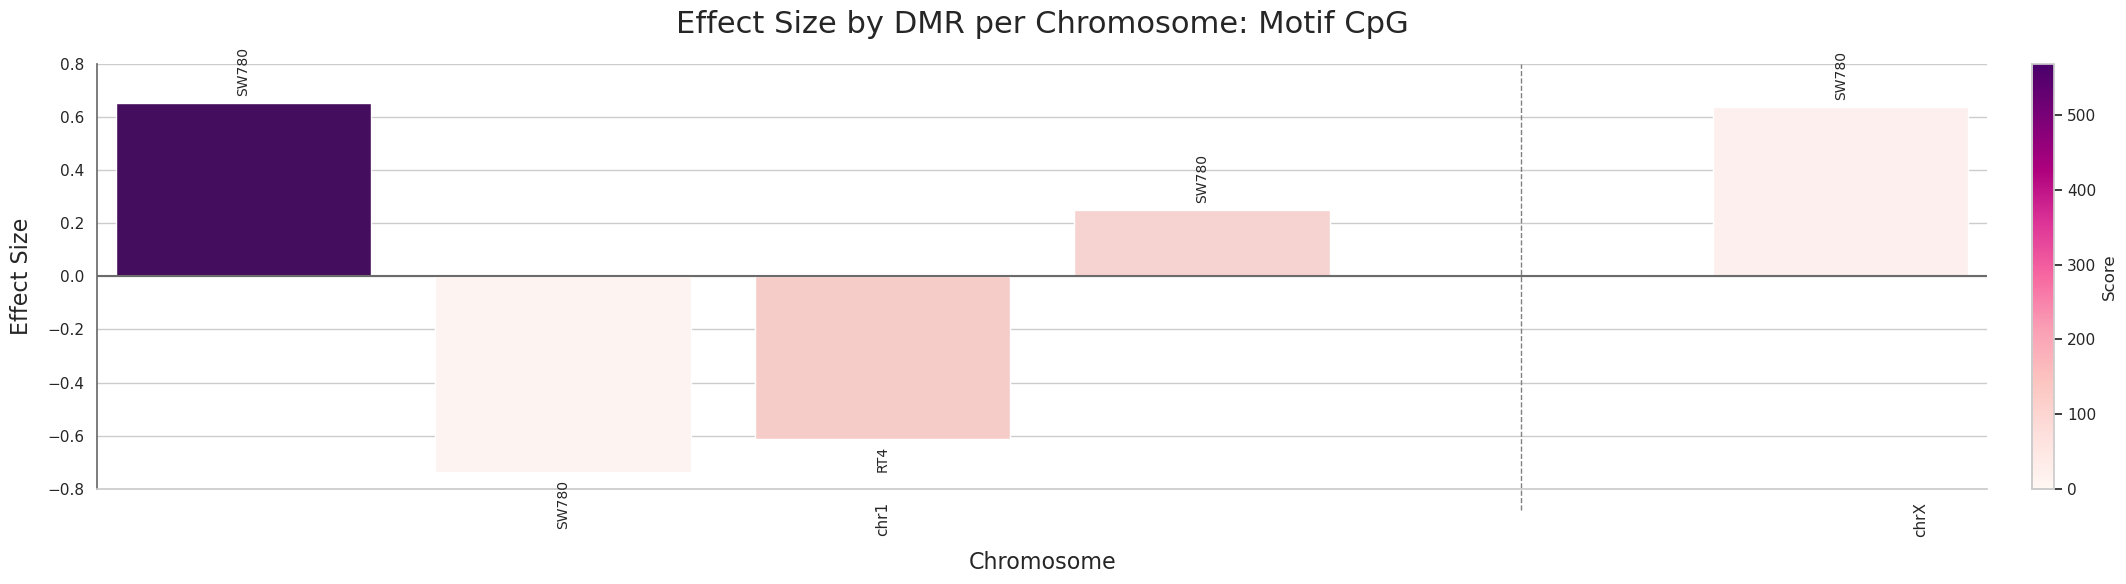

In [ ]:
run_plot_on_DMR(base = "C", plot_data = plot_data, data_source = data_source, save_name = '/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/plots/effect_size_DMRs.bothbebics.CpG.modkit.png')

## Look for minfi results

In [ ]:
tests_to_check = ['test2', 'test6']

In [ ]:
whole_DMR_df = pd.DataFrame()
for name_of_test in tests_to_check:
    
    # Set up variables 
    if name_of_test in BEBIC_B_tests:
        bebic = 'BEBIC_B'
        exp_list = exp_lists[0]
    elif name_of_test in BEBIC_C_tests:
        bebic = 'BEBIC_C'
        exp_list = exp_lists[1]
    else:
        raise ValueError('test not associated with a bebic')
    if name_of_test in CpG_tests:
        modBase = 'C'
        motif = 'CpG'
    elif name_of_test in AGG_tests:
        modBase = 'A'
        motif = 'AGG'
    elif name_of_test in C_tests:
        modBase = 'C'
        motif = 'C'
    elif name_of_test in A_tests:
        modBase = 'A'
        motif = 'A'
    else:
        raise ValueError('test not associated with a motif')
    
    # Set up paths
    plotting_dir = os.path.join(
        "/home/dejlu879/20240731-BEBIC_dmr", f"pipeline_{name_of_test}", "plots")
    path2_output = os.path.join("/home/dejlu879/20240731-BEBIC_dmr", f"pipeline_{name_of_test}", "output_data")
    int_data = os.path.join(
        ad, name_of_test, "intermediate_data_files")
    path2results = os.path.join(ad, name_of_test, "modkit")
    path2_dmrs = os.path.join(path2results, "all_test")
    # sigDMR_fp = os.path.join(int_data, f"sig_DMRs.{bebic}.modkit.csv")
    sigDMR_fp = os.path.join(path2_output, f"{bebic}.{motif}.{name_of_test}.minfiDSS_dmr.csv")
    
    # Get the list of sampels
    sample_names_list = get_sample_names(exp_list)
    
    # Get dataframe of different areas
    dmr_all_chrs_df = pd.read_csv(sigDMR_fp)
    dmr_all_chrs_df['testID'] = name_of_test
    dmr_all_chrs_df['test_description'] = f'{bebic}: {modBase} of {motif}'
    if bebic == 'BEBIC_B':
        dmr_all_chrs_df['cell line'] = 'SW780'
    else:
        dmr_all_chrs_df['cell line'] = 'RT4'
        
    
    if len(dmr_all_chrs_df) > 0:
        if len(whole_DMR_df) > 0:
            whole_DMR_df = pd.concat([whole_DMR_df, dmr_all_chrs_df])
        else:
            whole_DMR_df = dmr_all_chrs_df
    
        # print dmr df
        print(f"{name_of_test}: {bebic}, {motif}")
        display(dmr_all_chrs_df)
        print("")
    
whole_DMR_df

test2: BEBIC_B, CpG


,chrom,start,end,length,N_sites,samplea_percents,sampleb_percents,effect_size,areaStat,location,testID,test_description,cell line
0,chr22,5592508,5592571,64,11,0.580295,0.490804,0.089491,18.767999,chr22:5592508-5592571,test2,BEBIC_B: C of CpG,SW780
1,chr22,11147191,11147541,351,4,0.199004,0.069687,0.129317,10.346580,chr22:11147191-11147541,test2,BEBIC_B: C of CpG,SW780
2,chr21,351253,351769,517,4,0.270362,0.435896,-0.165534,-10.299742,chr21:351253-351769,test2,BEBIC_B: C of CpG,SW780
3,chr15,18498645,18500285,1641,4,0.424369,0.271110,0.153258,9.715131,chr15:18498645-18500285,test2,BEBIC_B: C of CpG,SW780
4,chr21,344007,344156,150,4,0.315389,0.445089,-0.129700,-8.292057,chr21:344007-344156,test2,BEBIC_B: C of CpG,SW780
5,chr14,1561527,1561585,59,4,0.692154,0.781146,-0.088992,-6.475291,chr14:1561527-1561585,test2,BEBIC_B: C of CpG,SW780
6,chr14,13868824,13868992,169,4,0.328847,0.247342,0.081505,3.894828,chr14:13868824-13868992,test2,BEBIC_B: C of CpG,SW780



test6: BEBIC_C, CpG


,chrom,start,end,length,N_sites,samplea_percents,sampleb_percents,effect_size,areaStat,location,testID,test_description,cell line
0,chr14,2194090,2195630,1541,35,0.616438,0.816181,-0.199743,-95.257730,chr14:2194090-2195630,test6,BEBIC_C: C of CpG,RT4
1,chr14,2193506,2193711,206,22,0.643215,0.788961,-0.145746,-45.627653,chr14:2193506-2193711,test6,BEBIC_C: C of CpG,RT4
2,chr14,2193822,2194010,189,22,0.658571,0.804295,-0.145724,-45.143780,chr14:2193822-2194010,test6,BEBIC_C: C of CpG,RT4
3,chr21,5559630,5559698,69,12,0.909994,0.803562,0.106433,25.924021,chr21:5559630-5559698,test6,BEBIC_C: C of CpG,RT4
4,chr21,3116399,3116461,63,12,0.924447,0.833463,0.090984,23.631661,chr21:3116399-3116461,test6,BEBIC_C: C of CpG,RT4
5,chr14,2192692,2192770,79,12,0.702975,0.822578,-0.119602,-21.564191,chr14:2192692-2192770,test6,BEBIC_C: C of CpG,RT4
6,chr14,2193067,2193122,56,9,0.669836,0.816743,-0.146907,-19.636555,chr14:2193067-2193122,test6,BEBIC_C: C of CpG,RT4
7,chr21,5558645,5558698,54,6,0.924348,0.824000,0.100349,13.247187,chr21:5558645-5558698,test6,BEBIC_C: C of CpG,RT4
8,chr13,9205739,9205812,74,6,0.789492,0.914319,-0.124827,-12.890954,chr13:9205739-9205812,test6,BEBIC_C: C of CpG,RT4
9,chr15,80309393,80309488,96,6,0.693367,0.547084,0.146284,11.435485,chr15:80309393-80309488,test6,BEBIC_C: C of CpG,RT4


,chrom,start,end,length,N_sites,samplea_percents,sampleb_percents,effect_size,areaStat,location,testID,test_description,cell line
0,chr22,5592508,5592571,64,11,0.580295,0.490804,0.089491,18.767999,chr22:5592508-5592571,test2,BEBIC_B: C of CpG,SW780
1,chr22,11147191,11147541,351,4,0.199004,0.069687,0.129317,10.346580,chr22:11147191-11147541,test2,BEBIC_B: C of CpG,SW780
2,chr21,351253,351769,517,4,0.270362,0.435896,-0.165534,-10.299742,chr21:351253-351769,test2,BEBIC_B: C of CpG,SW780
3,chr15,18498645,18500285,1641,4,0.424369,0.271110,0.153258,9.715131,chr15:18498645-18500285,test2,BEBIC_B: C of CpG,SW780
4,chr21,344007,344156,150,4,0.315389,0.445089,-0.129700,-8.292057,chr21:344007-344156,test2,BEBIC_B: C of CpG,SW780
5,chr14,1561527,1561585,59,4,0.692154,0.781146,-0.088992,-6.475291,chr14:1561527-1561585,test2,BEBIC_B: C of CpG,SW780
6,chr14,13868824,13868992,169,4,0.328847,0.247342,0.081505,3.894828,chr14:13868824-13868992,test2,BEBIC_B: C of CpG,SW780
0,chr14,2194090,2195630,1541,35,0.616438,0.816181,-0.199743,-95.257730,chr14:2194090-2195630,test6,BEBIC_C: C of CpG,RT4
1,chr14,2193506,2193711,206,22,0.643215,0.788961,-0.145746,-45.627653,chr14:2193506-2193711,test6,BEBIC_C: C of CpG,RT4
2,chr14,2193822,2194010,189,22,0.658571,0.804295,-0.145724,-45.143780,chr14:2193822-2194010,test6,BEBIC_C: C of CpG,RT4


Located in csv file: `/home/dejlu879/20240731-BEBIC_dmr/all_DMRs.minfi.csv`

### Annotate minfi results

In [ ]:
library("GenomicRanges")
library("data.table")
library("AnnotationHub")
library("GenomicFeatures")
library("dplyr")
library("stringr")
library(org.Hs.eg.db)

Loading required package: stats4

Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb


Attaching package: ‘data.table’


The following object is masked from ‘package:GenomicRanges’:

    shift


The fo

In [ ]:
ad = "/external/analyses/lucy/bebic_pipeline"

get_gene_info <- function(subject_idx, keytype) {
    
    geneids = genes_txdb$gene_id[subject_idx]
    # gene_symbols <- mapIds(org.Hs.eg.db, keys = geneids, column = "SYMBOL", keytype = "SYMBOL")
    
    # Sometimes it can't find any gene descriptions 
    result <- try({
        gene_descriptions <- mapIds(org.Hs.eg.db, keys = geneids, column = "GENENAME", keytype = keytype)
    }, silent = TRUE)

    # Check if an error occurred
    if (inherits(result, "try-error")) {
        print("No entries found, making an empty dataframe")
        # Create a dataframe with gene IDs, symbols, and descriptions
        gene_info <- data.frame(
            Symbol = geneids,
            EntrezID = rep(NA, length(subject_idx)),
            Description = rep(NA, length(subject_idx))
        )
    } else {
        print("Success")
        gene_entrez <- mapIds(org.Hs.eg.db, keys = geneids, column = "ENTREZID", keytype = keytype)
        # Create a dataframe with gene IDs, symbols, and descriptions
        gene_info <- data.frame(
            Symbol = geneids,
            EntrezID = gene_entrez,
            Description = gene_descriptions
        )
    }

    gene_info <- gene_info %>%
        mutate(Description = ifelse(startsWith(Symbol, "LOFF"), "rRNA", Description))

    return(gene_info)
}


fill_na_from_df2 <- function(df1, df2) {
  df1 %>% mutate(across(everything(), ~ ifelse(is.na(.), df2[[cur_column()]], .)))
}


add_missing_data <- function(gene_info) {

    # Gene names not quite perfectly annotated in this database from the names I started with, hunted for missing data
    # Found missing data! redo the description column:
    missing_data <- c(
        "RNA5S1_21" = "100169751", "TAF11L5_24" = "646066",
        "SNAR-C3_6" = "100170226", "LOFF_G0010787" = "110255164",
        "LOFF_G0010788" = "110255163", "LOFF_G0010304" = "106631779", 
        "LOFF_G0010292" = "106631780", "LOFF_G0010368" = "106631778", 
        "LOC100996442" = "WASH9P", "LOC283788_1" = "283788", "MGC70870_2" = "403340", 
        "LOC105379016_2" = "105379016", "LOC124901878_11" = "124901878"
    )  # manual additions
    missing_descriptions <- mapIds(org.Hs.eg.db, keys = missing_data, column = "GENENAME", keytype = "ENTREZID")

    # Add missing data 
    gene_info$EntrezID[gene_info$Symbol %in% names(missing_data)] <-
        missing_data[gene_info$Symbol[gene_info$Symbol %in% names(missing_data)]]

    gene_info$Description[gene_info$EntrezID %in% names(missing_descriptions)] <-
        missing_descriptions[gene_info$EntrezID[gene_info$EntrezID %in% names(missing_descriptions)]]

    return(gene_info)
}


In [ ]:

################# Import stuff #################
# Annotation file
annotations_T2T_fp = "/home/dejlu879/refs/T2T/chm13v2.0_RefSeq_Liftoff_v5.2.gff3.gz"
# Extract genes from the TxDb
annotations_T2T = txdbmaker::makeTxDbFromGFF(annotations_T2T_fp)
genes_txdb <- genes(annotations_T2T) # 'txdb' is TxDb object

# ENCODE folders
# encode_coverage_dir = "/home/dejlu879/refs/T2T/chm13_ENCODE/coverage"
encode_macs2peak_dir = "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed"
# List all BED files in the directory
bed_files <- list.files(path = encode_macs2peak_dir, pattern = "\\.bed$", full.names = TRUE)

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .extract_transcripts_from_GRanges(tx_IDX, gr, mcols0$type, mcols0$ID, :
“some transcripts have no "transcript_id" attribute ==> their name
  ("tx_name" column in the TxDb object) was set to NA”
Warning message in .extract_transcripts_from_GRanges(tx_IDX, gr, mcols0$type, mcols0$ID, :
“the transcript names ("tx_name" column in the TxDb object) imported
  from the "transcript_id" attribute are not unique”
Warning message in .find_exon_cds(exons, cds):
“The following transcripts have exons that contain more than one CDS
  (only the first CDS was kept for each exon): NM_001134939.1,
  NM_001172437.2, NM_001184961.1, NM_001301020.1, NM_001301302.1,
  NM_001301371.1, NM_002537.3, NM_004152.3, NM_015068.3, NM_016178.2”
OK



In [ ]:
path2Bdmr = "/home/dejlu879/20240731-BEBIC_dmr/all_DMRs.minfi.csv"
Bdmr_results = fread(path2Bdmr)

In [ ]:
Bdmr_results

chrom,start,end,length,N_sites,samplea_percents,sampleb_percents,effect_size,areaStat,location,testID,test_description,cell line
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr22,5592508,5592571,64,11,0.5802954,0.49080387,0.08949149,18.767999,chr22:5592508-5592571,test2,BEBIC_B: C of CpG,SW780
chr22,11147191,11147541,351,4,0.1990042,0.06968699,0.12931723,10.346580,chr22:11147191-11147541,test2,BEBIC_B: C of CpG,SW780
chr21,351253,351769,517,4,0.2703619,0.43589589,-0.16553395,-10.299742,chr21:351253-351769,test2,BEBIC_B: C of CpG,SW780
chr15,18498645,18500285,1641,4,0.4243688,0.27111037,0.15325841,9.715131,chr15:18498645-18500285,test2,BEBIC_B: C of CpG,SW780
chr21,344007,344156,150,4,0.3153890,0.44508870,-0.12969969,-8.292057,chr21:344007-344156,test2,BEBIC_B: C of CpG,SW780
chr14,1561527,1561585,59,4,0.6921538,0.78114570,-0.08899187,-6.475291,chr14:1561527-1561585,test2,BEBIC_B: C of CpG,SW780
chr14,13868824,13868992,169,4,0.3288473,0.24734200,0.08150531,3.894828,chr14:13868824-13868992,test2,BEBIC_B: C of CpG,SW780
chr14,2194090,2195630,1541,35,0.6164383,0.81618114,-0.19974287,-95.257730,chr14:2194090-2195630,test6,BEBIC_C: C of CpG,RT4
chr14,2193506,2193711,206,22,0.6432149,0.78896051,-0.14574559,-45.627653,chr14:2193506-2193711,test6,BEBIC_C: C of CpG,RT4


In [ ]:
B_gr = makeGRangesFromDataFrame(Bdmr_results, keep.extra.columns = TRUE)

In [ ]:
# Find overlaps between GRanges object and the genes
B_overlaps <- findOverlaps(B_gr, genes_txdb)
# Extract the indices of overlaps
B_query_idx <- queryHits(B_overlaps)        # Indices from B_gr
B_subject_idx <- subjectHits(B_overlaps)    # Indices from genes_txdb

gene_info_BS = get_gene_info(B_subject_idx, "SYMBOL")
gene_info_BA = get_gene_info(B_subject_idx, "ALIAS")
gene_info_B <- fill_na_from_df2(gene_info_BS, gene_info_BA)

gene_info_B <- add_missing_data(gene_info_B)

mcols(B_gr)$gene_id <- NA  # Initialize the gene_id column with NA in B_gr
mcols(B_gr)$gene_id[B_query_idx] <- genes_txdb$gene_id[B_subject_idx]
mcols(B_gr)$gene_id_strand <- NA  # Initialize the gene_id column with NA in B_gr
mcols(B_gr)$gene_id_strand[B_query_idx] <- strand(genes_txdb)[B_subject_idx]

match_idx <- match(mcols(B_gr)$gene_id, gene_info_B$Symbol) # Match gene_id column to Symbol column
mcols(B_gr)$gene_description <- NA # Initialize the gene_id column with NA in B_gr
mcols(B_gr)$gene_description <- gene_info_B$Description[match_idx]
mcols(B_gr)$EntrezID <- NA # Initialize the EntrezID column with NA in B_gr
mcols(B_gr)$EntrezID <- gene_info_B$EntrezID[match_idx]

'select()' returned 1:1 mapping between keys and columns



[1] "Success"


'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



[1] "Success"


'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [ ]:
# Check for overlaps in ENCODE macs2_peak data
for (file in bed_files) {
    # Extract the filename without the path
    filename <- basename(file)

    # Extract the "name" part from the filename (between "_" and ".")
    name <- str_extract(filename, "(?<=_)[^_]+(?=\\.)")

    # Print the extracted name (for debugging purposes)
    print(paste("  Processing file:", filename, "with name:", name))

    # Load the BED file using bedtorch
    # bed_data <- read_bed(file)

    bed_data <- fread(file)
    bed_data = makeGRangesFromDataFrame(
        bed_data, keep.extra.columns = TRUE, seqnames.field = c('chrom'), start.field = c('chromStart'), end.field = c('chromEnd'), strand.field = c('strand')
        )

    overlaps <- findOverlaps(B_gr, bed_data)
    # Extract the indices of overlaps
    query_idx <- queryHits(overlaps)        # Indices from B_gr
    subject_idx <- subjectHits(overlaps) # Indices from genes_txdb
    mcols(B_gr)[[name]] <- NA # Initialize the encode_name column with NA in B_gr
    mcols(B_gr)[[name]][query_idx] <- str_extract(bed_data$name[subject_idx], "peak_\\d+$")

}

[1] "  Processing file: chm13v2.0_22Rv1.CTCF.bed with name: 22Rv1.CTCF"
[1] "  Processing file: chm13v2.0_22Rv1.H3K27ac.bed with name: 22Rv1.H3K27ac"
[1] "  Processing file: chm13v2.0_BE2C.H3K27me3.bed with name: BE2C.H3K27me3"


Warning message in .merge_two_Seqinfo_objects(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chrY
  - in 'y': chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr10, chr11, chr12, chr17, chr18, chr19, chr20, chrX
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”


[1] "  Processing file: chm13v2.0_BE2C.H3K36me3.bed with name: BE2C.H3K36me3"
[1] "  Processing file: chm13v2.0_BE2C.H3K4me1.bed with name: BE2C.H3K4me1"


Warning message in .merge_two_Seqinfo_objects(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chrY
  - in 'y': chr1, chr2, chr3, chr4, chr5, chr6, chr7, chr10, chr11, chr12, chr17, chr18, chr19, chr20, chrX
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”


[1] "  Processing file: chm13v2.0_BE2C.H3K9me3.bed with name: BE2C.H3K9me3"
[1] "  Processing file: chm13v2.0_brain_microvascular_endothelial_cell.H3K27ac.bed with name: cell.H3K27ac"
[1] "  Processing file: chm13v2.0_brain_microvascular_endothelial_cell.H3K27me3.bed with name: cell.H3K27me3"
[1] "  Processing file: chm13v2.0_brain_microvascular_endothelial_cell.H3K36me3.bed with name: cell.H3K36me3"
[1] "  Processing file: chm13v2.0_C4-2B.CTCF.bed with name: C4-2B.CTCF"
[1] "  Processing file: chm13v2.0_C4-2B.H3K27ac.bed with name: C4-2B.H3K27ac"
[1] "  Processing file: chm13v2.0_Caco-2.H3K4me1.bed with name: Caco-2.H3K4me1"
[1] "  Processing file: chm13v2.0_Caco-2.H3K9me3.bed with name: Caco-2.H3K9me3"
[1] "  Processing file: chm13v2.0_epithelial_cell_of_prostate_male.CTCF.bed with name: male.CTCF"
[1] "  Processing file: chm13v2.0_epithelial_cell_of_prostate_male.H3K27ac.bed with name: male.H3K27ac"
[1] "  Processing file: chm13v2.0_HAP-1.H3K27ac.bed with name: HAP-1.H3K27ac"
[1] " 

In [ ]:
B_gr

GRanges object with 24 ranges and 58 metadata columns:
       seqnames            ranges strand |    length   N_sites samplea_percents
          <Rle>         <IRanges>  <Rle> | <integer> <integer>        <numeric>
   [1]    chr22   5592508-5592571      * |        64        11         0.580295
   [2]    chr22 11147191-11147541      * |       351         4         0.199004
   [3]    chr21     351253-351769      * |       517         4         0.270362
   [4]    chr15 18498645-18500285      * |      1641         4         0.424369
   [5]    chr21     344007-344156      * |       150         4         0.315389
   ...      ...               ...    ... .       ...       ...              ...
  [20]    chr16 35931635-35932324      * |       690         4         0.325716
  [21]    chr22   5828198-5829009      * |       812         4         0.130656
  [22]     chr8 45549742-45549895      * |       154         4         0.459003
  [23]     chrY 31736731-31736786      * |        56         4   

In [ ]:
b_fn = paste0("all_DMRs.minfi.annotated.csv")
write.csv(B_gr, file = b_fn)

### Plot effect size

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

sns.set_theme(style='whitegrid')

chr_names = [
    "chr1", "chr2", "chr3", "chr4", "chr5",
    "chr6", "chr7", "chr8", "chr9", "chr10",
    "chr11", "chr12", "chr13", "chr14", "chr15",
    "chr16", "chr17", "chr18", "chr19", "chr20",
    "chr21", "chr22", "chrX", "chrY", "chrM"
]

In [ ]:
def add_names_col(df):
    # get list for names
    df['name'] = None
    chr_count = 1
    chrom = 'chr1'
    for i, row in df.iterrows():
        # print(i)
        # print(row)
        if row['chrom'] == chrom:
            df.at[i, 'name'] = f'{str(row["chrom"])[3:]}.{str(chr_count)}'
            chr_count += 1
        else:
            chrom = row['chrom']
            chr_count = 1
            df.at[i, 'name'] = f'{str(row["chrom"])[3:]}.{str(chr_count)}'
            chr_count += 1
    return df


def adjust_x_for_chromosomes(df, spacer_value=-1):
    df = df.copy()
    new_rows = []
    count = 1

    chromosomes = df['chrom'].unique()
    num_to_add = 0
    spacer_rows = []

    for chrom in chromosomes:
        chrom_df = df[df['chrom'] == chrom].copy()
        chrom_df['x_pos'] = range(count, count + len(chrom_df))
        count += len(chrom_df)

        # Add the chrom_df to the new_rows list
        new_rows.append(chrom_df)

        # Append a spacer bar with NaN effect size and transparent color
        spacer_row = {
            'chrom': chrom,
            'start': spacer_value,
            'effect_size': 0,
            'score': 0,
            'x_pos': count,
            'name': ""
        }

        spacer_df = pd.DataFrame([spacer_row])
        new_rows.append(spacer_df)
        spacer_rows.append(count - 1)

        count += 1  # Increment the count for the next chromosome
    new_rows.pop()
    # Concatenate the list of DataFrames into a single DataFrame
    df_adjusted = pd.concat(new_rows, ignore_index=True)

    return df_adjusted, chromosomes, spacer_rows

def run_plot_on_DMR_minfi(base, plot_data, data_source, save_name):
    if data_source == 'modkit':
        # switch sides so that increased methylation in Test is up, and vice versa
        plot_data["effect_size"] = plot_data["effect_size"] * -1
    
    # if score_threshold:
    #     plot_data = plot_data.loc[plot_data["score"] >= score_threshold]
    
    # Apply the function to adjust x values
    # plot_data_adjusted, chromosomes = adjust_x_for_chromosomes(plot_data)
    plot_data_adjusted, chromosomes, spacer_rows = adjust_x_for_chromosomes(plot_data)
    # display(plot_data_adjusted.head())

    # Create a single plot with adjusted x values
    fig = plt.figure(figsize=(24, 6))

    # Define a color map based on the "score" column
    norm = mcolors.Normalize(
        vmin=0, vmax=plot_data_adjusted['score'].max())
        # vmin=plot_data_adjusted['score'].min(), vmax=plot_data_adjusted['score'].max())
    cmap = plt.get_cmap('RdPu')
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    plot_data_adjusted['color'] = plot_data_adjusted['score'].apply(
        lambda x: sm.to_rgba(x))

    # Mark spacer bars with a gray color
    plot_data_adjusted['color'] = np.where(
        plot_data_adjusted['effect_size'] == 0, 'gray', plot_data_adjusted['color'])

    # Plot the data with graduated shading
    bar_plot = sns.barplot(
        data=plot_data_adjusted, x='x_pos', y='effect_size',
        hue='x_pos', legend=False, palette=plot_data_adjusted['color'].tolist(), errorbar=None, )

    # Add labels to bars
    for i, bar in enumerate(bar_plot.containers):
        if (i in spacer_rows):
            continue
        # names = list(plot_data_adjusted['name'])
        cell_line = list(plot_data_adjusted['cell line'])
        # coord = list(plot_data_adjusted['location.1'])
        # # name = f"S{names[i]} - {plot_data_adjusted['base'][i]}"
        name = f"{cell_line[i]}"
        bar_plot.bar_label(bar, [name], fontsize=10, padding=5, rotation=90)

    # Customize plot
    # bar_plot.set_ylim(0.0,0.27)
    bar_plot.set_ylim(-0.4, 0.4)

    plt.title(
        f'Effect Size by DMR per Chromosome: Motif CpG',
        fontsize=22, pad=22)
    plt.xlabel('Chromosome', fontsize=16, labelpad=10)
    plt.ylabel('Effect Size', fontsize=16, labelpad=10)

    # Add vertical lines at the end of each chromosome and store positions for tick labels
    prev_val = 0
    chrom_tick_positions = list()
    for chrom in chromosomes:
        max_pos = plot_data_adjusted[plot_data_adjusted['chrom'] == chrom]['x_pos'].max(
        )
        # Add vertical lines extending beyond the plot limits
        val = max_pos - 1
        if (chrom != chromosomes[-1]):
            plt.gca().axvline(
                x=val, color='gray', linestyle='--',
                linewidth=1, ymin=-0.05, ymax=1, clip_on=False)
        chrom_tick_positions.append((prev_val + ((val - prev_val) / 2)))
        prev_val = val
    chrom_tick_positions[-1] += 0.75

    # Set x-axis tick labels with chromosome names
    chrom_tick_labels = plot_data_adjusted['chrom'].unique()

    plt.xticks(
        ticks=chrom_tick_positions,
        labels=chrom_tick_labels, rotation=90)

    # Add color bar for score
    cbar = plt.colorbar(sm, aspect=20, ax=plt.gca(), pad=0.02)
    cbar.set_label('Score')

    # Remove all borders
    bar_plot.margins(0.01)
    sns.despine(right=True)
    
    # Customize the axis lines
    ax = plt.gca()
    ax.spines['left'].set_color('#6b6b6bff')
    ax.axhline(0, color='#6b6b6bff', linewidth=1.5)

    # Customize the grid lines
    # plt.grid(color='gray', linestyle='-', linewidth=0.5)

    plt.tight_layout()
    plt.savefig(save_name, dpi=300)

    return

In [3]:
sigDMP_fp = "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/all_DMRs.minfi.csv"

data_source = 'minfi'

with open(sigDMP_fp, 'r') as fp:
    plot_data = pd.read_csv(fp, sep=',')
    plot_data.set_index("location", drop=False, inplace=True)
    plot_data.rename({"location": "location.1", "areaStat": "score"}, axis=1, inplace=True)
    
plot_data['chrom'] = pd.Categorical(plot_data['chrom'], categories=chr_names, ordered=True)
plot_data = plot_data.sort_values(by=['chrom', 'start'])
plot_data['score'] = plot_data['score'].abs()
    
if "names" not in plot_data.columns:
    plot_data = add_names_col(plot_data)
    
plot_data.head()

,chrom,start,end,length,N_sites,samplea_percents,sampleb_percents,effect_size,score,location.1,testID,test_description,cell line,name
location,,,,,,,,,,,,,,
chr8:45549742-45549895,chr8,45549742,45549895,154,4,0.459003,0.310126,0.148877,8.994010,chr8:45549742-45549895,test6,BEBIC_C: C of CpG,RT4,8.1
chr8:45624638-45624910,chr8,45624638,45624910,273,4,0.770296,0.612533,0.157762,9.702492,chr8:45624638-45624910,test6,BEBIC_C: C of CpG,RT4,8.2
chr9:52843736-52843886,chr9,52843736,52843886,151,5,0.718569,0.561592,0.156977,11.025729,chr9:52843736-52843886,test6,BEBIC_C: C of CpG,RT4,9.1
chr13:9205739-9205812,chr13,9205739,9205812,74,6,0.789492,0.914319,-0.124827,12.890954,chr13:9205739-9205812,test6,BEBIC_C: C of CpG,RT4,13.1
chr14:1561527-1561585,chr14,1561527,1561585,59,4,0.692154,0.781146,-0.088992,6.475291,chr14:1561527-1561585,test2,BEBIC_B: C of CpG,SW780,14.1


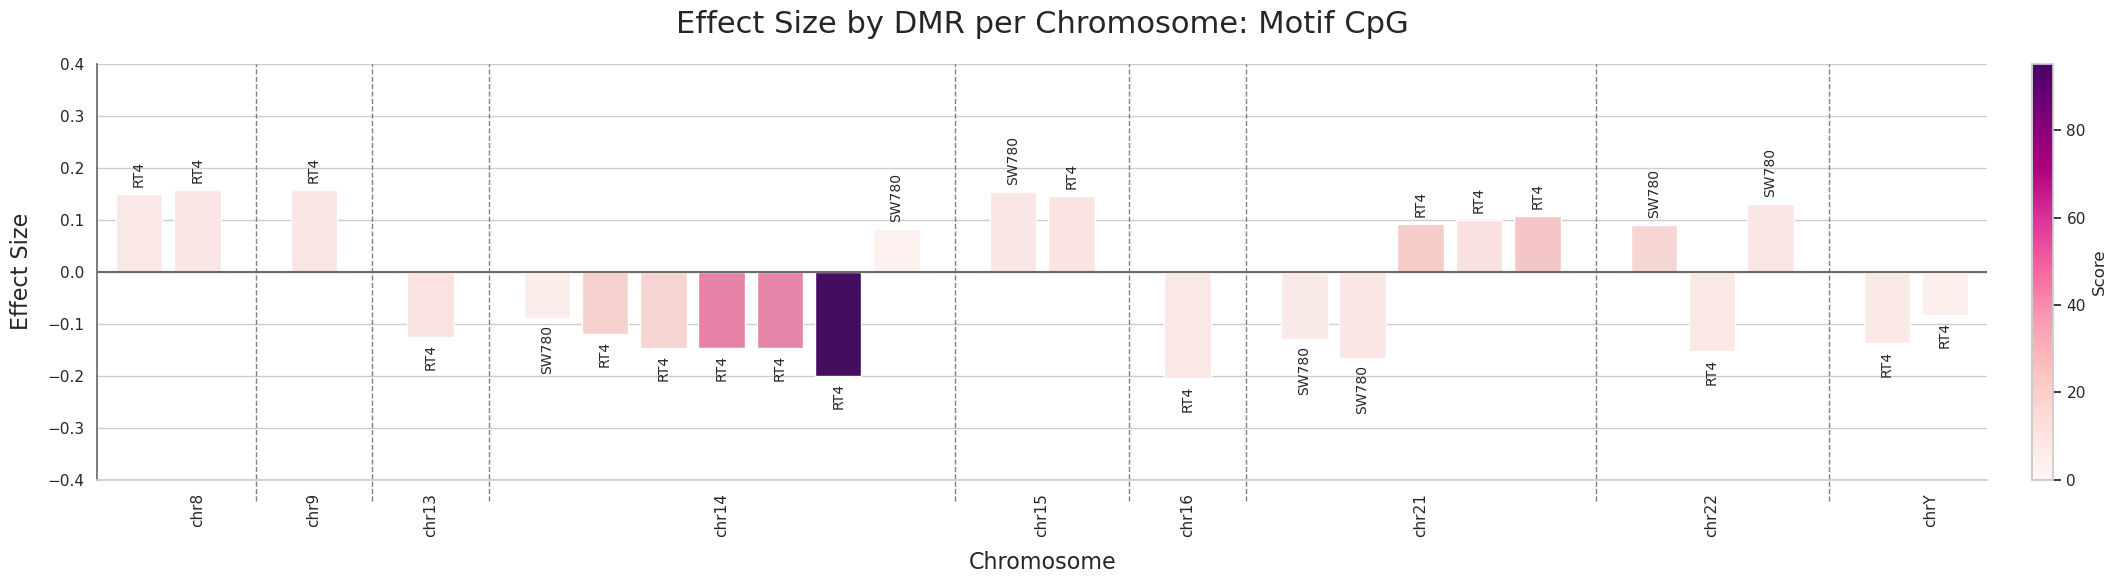

In [4]:
run_plot_on_DMR_minfi(base = "C", plot_data = plot_data, data_source = data_source, save_name = '/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/plots/effect_size_DMRs.bothbebics.CpG.minfi.png')

## Plot karyoplot of results

In [3]:
library("GenomicRanges")
library("data.table")
library("dplyr")
library("AnnotationHub")
library("GenomicFeatures")
library("stringr")
library("karyoploteR", "BSgenome")


printf <- function(text) {
    print(text)
    flush.console()
}


get_encode_file_list <- function() {
    encode_macs2peak_dir = "/home/dejlu879/refs/T2T/chm13_ENCODE/macs2_peak_bed"
    bed_files <- list.files(path = encode_macs2peak_dir, pattern = "\\.bed$", full.names = TRUE)

    file_list = list()

    for (file in bed_files) {
        # Extract the filename without the path
        filename <- basename(file)

        # Extract the "name" part from the filename (between "_" and ".")
        name <- str_extract(filename, "(?<=_)[^_]+(?=\\.)")
        file_list[[name]] <- file
    }
    return(file_list)
}


get_vars <- function(name_of_test) {
    if (name_of_test %in% BEBIC_B_tests) {
    bebic <- 'BEBIC_B'
    # exp_list <- exp_lists[[1]]
    } else if (name_of_test %in% BEBIC_C_tests) {
    bebic <- 'BEBIC_C'
    # exp_list <- exp_lists[[2]]
    } else {
    stop('test not associated with a bebic')
    }

    if (name_of_test %in% CpG_tests) {
            modBase <- 'C'
            motif <- 'CpG'
        } else if (name_of_test %in% AGG_tests) {
            modBase <- 'A'
            motif <- 'AGG'
        } else if (name_of_test %in% C_tests) {
            modBase <- 'C'
            motif <- 'C'
        } else if (name_of_test %in% A_tests) {
            modBase <- 'A'
            motif <- 'A'
        } else {
            stop('test not associated with a motif')
    }

    if (name_of_test %in% modkit_score_8) {
            modkit_score <- 8
        } else if (name_of_test %in% modkit_score_1) {
            modkit_score <- 1
        } else if (name_of_test %in% modkit_score_6) {
            modkit_score <- 6
        } else if (name_of_test %in% modkit_score_2) {
            modkit_score <- 2
        } else {
            stop('test not associated with a score')
    }

    if (name_of_test %in% minfi_score_50) {
            minfi_score <- 50
        } else if (name_of_test %in% minfi_score_100) {
            minfi_score <- 100
        } else if (name_of_test %in% minfi_score_10) {
            minfi_score <- 10
        } else if (name_of_test %in% minfi_score_20) {
            minfi_score <- 20
        } else {
            stop('test not associated with a score')
    }

    path2_output = paste0("/home/dejlu879/20240731-BEBIC_dmr/pipeline_", name_of_test, "/output_data/")

    return(list(bebic = bebic, modBase = modBase, motif = motif, path2_output = path2_output, modkit_score = modkit_score, minfi_score = minfi_score))
}


order_my_chroms <- function(my_chrom_list) {
    chromosome_order <- c(paste0("chr", 1:22), "chrX", "chrY", "chrM")
    ordered_chromosomes <- factor(my_chrom_list, levels = chromosome_order)
    ordered_chromosomes <- sort(ordered_chromosomes)
    ordered_chromosomes <- as.character(ordered_chromosomes)
    return(ordered_chromosomes)
}


replace_dots <- function(name) {
    # Function to replace all but the last dot with a hyphen
    sub("\\.(?=[^.]*$)", "TEMP_REPLACE", name, perl = TRUE) %>%
        gsub("\\.", "-", .) %>%
        gsub("TEMP_REPLACE", ".", .)
}


get_up_DMPs <- function(DMP_data, data_source) {
    # Get up methylated in BCG 
    if (data_source == 'modkit') {
        data <- DMP_data[balanced_effect_size < 0]
    } else {
        data <- DMP_data[balanced_effect_size > 0]
    }
    return(data)
}


get_down_DMPs <- function(DMP_data, data_source) {
    # Get down methylated in BCG 
    if (data_source == 'modkit') {
        data <- DMP_data[balanced_effect_size > 0]
    } else {
        data <- DMP_data[balanced_effect_size < 0]
    }
    return(data)
}


get_encode_data <- function(DMP_data_df) {
    # Function to process encode data
    # use a different colour for dif types of binding site

    ignore_columns = c('V1','seqnames','start','end','width','strand', 'location', 'location.1', "state_name", "N_sites", "samplea_counts", "sampleb_counts", "samplea_percents", "sampleb_percents", "samplea_fraction_modified", "sampleb_fraction_modified", "testID", "test_description", 'balanced_effect_size','score', 'areaStat', 'pval','name','also_in_other','gene_id','gene_id_strand','gene_description','EntrezID', 'length', 'cell.line')

    # Get encode data
    printf("Getting encode data from DMP results")
    encode_data = list()
    columns = colnames(DMP_data_df)  # binding type is the colname
    for (colname in columns) {
        if (colname %in% ignore_columns) {
            # skip all data that's not encode
            next
        }

        # Get list of peaks noted for each encode dataset
        peaks = unique(DMP_data_df[[colname]])  # peak is in the row of the respective binding column

        # Add peaks to list
        if (length(peaks) > 0) {
            if (colname %in% names(encode_data)) {
                encode_data[[colname]] <- c(encode_data[[colname]], peaks)
            } else {
                encode_data[[colname]] <- peaks
            }
        }
    }

    # Somewhere the names were replaced by dots so the filename doesn't match unless I change the dots
    names(encode_data) = sapply(names(encode_data), replace_dots)

    # Actually get the data
    printf("getting coordinates for binding sites that overlap my DMPs")
    # Initialize an empty list to store the extracted data
    extracted_data <- list()
    i = 0
    for (colname in names(encode_data)) {
        # printf(colname)
        
        peaks <- encode_data[[colname]]
        if (length(peaks) == 1 && is.na(peaks)) {
            next
        }
        
        i = i+1

        peaks <- peaks[!is.na(peaks)]

        # strip X if it exists
        newname = sub("^X", "", colname)
        bed_file = bed_files[[newname]]  
        bed_data <- fread(bed_file)
        bed_data = makeGRangesFromDataFrame(
            bed_data, keep.extra.columns = TRUE, seqnames.field = c('chrom'), start.field = c('chromStart'), end.field = c('chromEnd'), strand.field = c('strand')
        )

        # Extract the "peak" information
        bed_data$peak_number <- gsub(".*_(peak_\\d+)$", "\\1", bed_data$name)
        
        # Filter to relevant peaks
        filt_bed_data <- subset(bed_data, peak_number %in% peaks)
        filt_bed_data$encode_annot = newname

        # Extract the desired column and genomic locations
        extracted_gr <- filt_bed_data[, c("encode_annot")]
        # Store the extracted GRanges object in the list
        extracted_data[[i]] <- extracted_gr
    }
    
    # Combine all extracted GRanges objects into one
    encode_annotations <- do.call(c, extracted_data)

    # add column for binding type
    if (is.null(encode_annotations)) {
        return(c())
    }
    encode_annotations$bind_type <- sapply(strsplit(encode_annotations$encode_annot, "\\."), function(x) x[2])

    return(encode_annotations)
}




Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb


Attaching package: ‘data.table’


The fo

In [4]:
# Function to plot karyplot
plot_karyoplot_for_BEBIC_test <- function(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_annotations, region_colours, my_topgenes_gr, genes_txdb, chroms) {
    # Plot Karyoplot
    pp <- getDefaultPlotParams(plot.type = 1)
    pp$ideogramheight <- 15
    pp$data1inmargin = 10
    pp$data1outmargin = 60
    pp$leftmargin = 0.2
    # print(pp)

    kplot <- plotKaryotype(
        cytobands = ideogram_gr, plot.type = 1, plot.params = pp,
        chromosomes = chroms, cex = 2)#, labels.plotter = NULL
        # chromosomes = c("chr21", "chr22")  #, cex = 2, labels.plotter = NULL
    # )
    # kpAddChromosomeNames(kplot, xoffset = -0.03, cex = 1.5)
    kpAddBaseNumbers(kplot)

    # Set tracks
    minfi_track = autotrack(current.track = 1, total.tracks = 4, margin = 0.1)
    minfi_down_track = autotrack(current.track = 1, total.tracks = 2, r0=minfi_track$r0, r1=minfi_track$r1)
    minfi_up_track = autotrack(current.track = 2, total.tracks = 2, r0=minfi_track$r0, r1=minfi_track$r1)
    modkit_track = autotrack(current.track = 2, total.tracks = 4, margin = 0.1)
    modkit_down_track = autotrack(current.track = 1, total.tracks = 2, r0=modkit_track$r0, r1=modkit_track$r1)
    modkit_up_track = autotrack(current.track = 2, total.tracks = 2, r0=modkit_track$r0, r1=modkit_track$r1)
    # adjust encode for size based on what dmp tracks do
    encode_track = autotrack(current.track = 3, total.tracks = 4, margin = 0.1)
    encode_actual_track = autotrack(current.track = 1, total.tracks = 2, r0=encode_track$r0, r1=encode_track$r1)
    encode_bottomgene_track = autotrack(current.track = 2, total.tracks = 2, r0=encode_track$r0, r1=encode_track$r1)  # gets the value for the bottom of the gene track relative to other tracks
    gene_track = autotrack(current.track = 4, total.tracks = 4, margin = 0.1)
    # gene_track_full = autotrack(current.track = c(4,5), total.tracks = 5, margin = 0.1)

    # Backgrounds
    kpDataBackground(kplot, r0 = minfi_track$r0, r1 = minfi_track$r1, color = "#eaeaea")
    kpDataBackground(kplot, r0 = encode_track$r0, r1 = encode_actual_track$r1, color = "#eaeaea")

    # Labels
    kpAddLabels(kplot, labels = "Minfi", pos = 1, label.margin = 0.08, srt = 0, cex = 1.2, r0 = minfi_track$r0, r1 = minfi_track$r1)
    kpAddLabels(kplot, labels = "Modkit", pos=1, label.margin = 0.08, srt=0, cex = 1.2, r0=modkit_track$r0, r1=modkit_track$r1)
    kpAddLabels(kplot, labels = "ENCODE", pos=1, label.margin = 0.08, srt=0, cex = 1.2, r0=encode_actual_track$r0, r1=encode_actual_track$r1)
    kpAddLabels(kplot, labels = "Genes", pos=1, label.margin = 0.08, srt=0, cex = 1.2, r0=encode_bottomgene_track$r0, r1=gene_track$r1)
    
    # Plot Minfi DMP track

    # kpDataBackground(kplot, r0 = minfi_track$r0, r1 = minfi_track$r1, color = "lightblue")
    kpPlotRegions(kplot, data=minfi_upDMP_gr, r0 = minfi_up_track$r0, r1 = minfi_up_track$r1, avoid.overlapping = FALSE, col = '#0072B2')
    kpPlotRegions(kplot, data=minfi_downDMP_gr, r0 = minfi_down_track$r1, r1 = minfi_down_track$r0, avoid.overlapping = FALSE, col = '#E69F00')
    kpAbline(kplot, h=0, r0 = minfi_up_track$r0, r1 = minfi_up_track$r1)

    # Plot Modkit DMP track
    # kpDataBackground(kplot, r0 = modkit_track$r0, r1 = modkit_track$r1, color = "lightgreen")
    kpPlotRegions(kplot, data=modkit_upDMP_gr, r0 = modkit_up_track$r0, r1 = modkit_up_track$r1, avoid.overlapping = FALSE, col = '#0072B2')
    kpPlotRegions(kplot, data=modkit_downDMP_gr, r0 = modkit_down_track$r1, r1 = modkit_down_track$r0, avoid.overlapping = FALSE, col = '#E69F00')
    kpAbline(kplot, h=0, r0 = modkit_up_track$r0, r1 = modkit_up_track$r1)

    # Plot ENCODE
    # kpDataBackground(kplot, r0 = encode_track$r0, r1 = encode_track$r1, color = "orange")
    kpPlotRegions(kplot, data=encode_annotations, r0 = encode_track$r0, r1 = encode_actual_track$r1, avoid.overlapping = FALSE, col = region_colours)  # r1 = encode_track$r1-0.05

    # kpDataBackground(kplot, r0 = gene_track_full$r0, r1 = gene_track_full$r1, color = "lightyellow")

    # kpPlotRegions(kplot, data=my_genes_gr, r0 = gene_track$r0, r1 = gene_track$r1-0.08, avoid.overlapping = FALSE)
    kpPlotMarkers(kplot, data=my_topgenes_gr, labels=my_topgenes_gr$gene_id, r0 = encode_bottomgene_track$r0, r1 = encode_bottomgene_track$r1)
}

In [5]:

# T2T genome ideogram
ideogram_table <- read.table("/home/dejlu879/20240731-BEBIC_dmr/plotting/ideogram.T2T.bed", sep = "\t", header = TRUE)
ideogram_gr <- GRanges(ideogram_table)

# Annotation file
annotations_T2T_fp = "/home/dejlu879/refs/T2T/chm13v2.0_RefSeq_Liftoff_v5.2.gff3.gz"
# Extract genes from the TxDb
annotations_T2T = txdbmaker::makeTxDbFromGFF(annotations_T2T_fp)
genes_txdb <- genes(annotations_T2T) # 'txdb' is TxDb object

bed_files = get_encode_file_list()

# Encode colouring
new_names = names(bed_files)
new_names <- sapply(strsplit(new_names, "\\."), function(x) x[2])
new_names <- unique(new_names)
encode_colours = rainbow(length(new_names))
names(encode_colours) <- new_names

# DMP colouring
dmp_legend_names = c('Increased Mod', 'Decreased Mod')
dmp_colours = c('#0072B2', '#E69F00')
names(dmp_colours) <- dmp_legend_names


Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .extract_transcripts_from_GRanges(tx_IDX, gr, mcols0$type, mcols0$ID, :
"some transcripts have no "transcript_id" attribute ==> their name
  ("tx_name" column in the TxDb object) was set to NA"
Warning message in .extract_transcripts_from_GRanges(tx_IDX, gr, mcols0$type, mcols0$ID, :
"the transcript names ("tx_name" column in the TxDb object) imported
  from the "transcript_id" attribute are not unique"
Warning message in .find_exon_cds(exons, cds):
"The following transcripts have exons that contain more than one CDS
  (only the first CDS was kept for each exon): NM_001134939.1,
  NM_001172437.2, NM_001184961.1, NM_001301020.1, NM_001301302.1,
  NM_001301371.1, NM_002537.3, NM_004152.3, NM_015068.3, NM_016178.2"
OK



In [36]:
# Set up variables
name_of_test = "CpG_DMRs"
# bebic = 'both'
# bebic = 'SW780'
bebic = 'RT4'
modBase = 'C'
motif = 'CpG'
path2_output = "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/"
modkit_score = 10
minfi_score_up = 3
minfi_score_down = -3

# Load modkit and minfi data for the test
modkit_DMP_name = "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/all_DMRs.modkit.annotated.csv"
minfi_DMP_name = "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/all_DMRs.minfi.annotated.csv"
modkit_DMP_data = fread(modkit_DMP_name)
minfi_DMP_data = fread(minfi_DMP_name)
modkit_DMP_data = rename(modkit_DMP_data, balanced_effect_size = effect_size)
minfi_DMP_data = rename(minfi_DMP_data, balanced_effect_size = effect_size, score = areaStat)

# restrict to each bebic
modkit_DMP_data = filter(modkit_DMP_data, cell.line == bebic)
minfi_DMP_data = filter(minfi_DMP_data, cell.line == bebic)

# Get up and down DMPs
up_DMPs_modkit = get_up_DMPs(DMP_data = modkit_DMP_data, data_source = 'modkit')
down_DMPs_modkit = get_down_DMPs(DMP_data = modkit_DMP_data, data_source = 'modkit')
up_DMPs_minfi = get_up_DMPs(DMP_data = minfi_DMP_data, data_source = 'minfi')
down_DMPs_minfi = get_down_DMPs(DMP_data = minfi_DMP_data, data_source = 'minfi')

# Filter to score
up_topDMPs_modkit <- up_DMPs_modkit[up_DMPs_modkit$score >= modkit_score, ]
down_topDMPs_modkit <- down_DMPs_modkit[down_DMPs_modkit$score >= modkit_score, ]
up_topDMPs_minfi <- up_DMPs_minfi[up_DMPs_minfi$score >= minfi_score_up, ]
down_topDMPs_minfi <- down_DMPs_minfi[down_DMPs_minfi$score <= minfi_score_down, ]

##########################################

# get granges object ready for plotting top scoring DMPs
modkit_upDMP_gr = makeGRangesFromDataFrame(up_topDMPs_modkit, keep.extra.columns = TRUE)
modkit_downDMP_gr = makeGRangesFromDataFrame(down_topDMPs_modkit, keep.extra.columns = TRUE)
minfi_upDMP_gr = makeGRangesFromDataFrame(up_topDMPs_minfi, keep.extra.columns = TRUE)
minfi_downDMP_gr = makeGRangesFromDataFrame(down_topDMPs_minfi, keep.extra.columns = TRUE)

# ##########################################
# Plot encode data
# Merging all encode data together, not distinguished by experiment or up/down modified
encode_gr1 = get_encode_data(up_topDMPs_modkit)
encode_gr2 = get_encode_data(down_topDMPs_modkit)
encode_gr3 = get_encode_data(up_topDMPs_minfi)
encode_gr4 = get_encode_data(down_topDMPs_minfi)

# convert to dt - first check if granges object exists
# check if it's made already before doing merges
# follow logic - good luck
initialised = FALSE
dt = NULL

if (length(encode_gr1) > 0) {
    dt <- copy(as.data.table(encode_gr1))
    initialised = TRUE
    printf('1')
}
if (length(encode_gr2) > 0) {
    dt2 <- copy(as.data.table(encode_gr2))
    if (initialised) {
        dt <- merge(dt, dt2, all = TRUE)
    } else {
        dt = dt2
        initialised = TRUE
        printf('2')
    }
}
if (length(encode_gr3) > 0) {
    dt3 <- copy(as.data.table(encode_gr3))
    if (initialised) {
        dt <- merge(dt, dt3, all = TRUE)
    } else {
        dt = dt3
        initialised = TRUE
        printf('3')
    }
}
if (length(encode_gr4) > 0) {
    dt4 <- copy(as.data.table(encode_gr4))
    if (initialised) {
        dt <- merge(dt, dt4, all = TRUE)
    } else {
        dt = dt4
        initialised = TRUE
        printf('4')
    }
}

if (initialised) {
    encode_gr = makeGRangesFromDataFrame(dt, keep.extra.columns = TRUE)
    # Assign colors to each region based on encode_annot
    region_colours <- encode_colours[encode_gr$bind_type]
} else {
    printf('No encode data in key regions.')
    encode_gr = GRanges()
    region_colours = c()
}


##########################################
# Get genes to plot
# Combine all DMP data

my_topgenes = unique(c(unique(modkit_upDMP_gr$gene_id), unique(modkit_downDMP_gr$gene_id), unique(minfi_upDMP_gr$gene_id), unique(minfi_downDMP_gr$gene_id)))

my_topgenes_gr <- subset(genes_txdb, gene_id %in% my_topgenes)

##########################################
# Find out how many chromosomes
chroms = unique(c(seqnames(modkit_upDMP_gr), seqnames(modkit_downDMP_gr), seqnames(minfi_upDMP_gr), seqnames(minfi_downDMP_gr)))
chroms <- order_my_chroms(chroms)
num_chr = length(chroms)

rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.', bebic, '.Rdata')
save(num_chr, ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms, dmp_legend_names, dmp_colours, new_names, encode_colours, file = rdata_fn)


[1] "Getting encode data from DMP results"
[1] "getting coordinates for binding sites that overlap my DMPs"
[1] "Getting encode data from DMP results"
[1] "getting coordinates for binding sites that overlap my DMPs"
[1] "Getting encode data from DMP results"
[1] "getting coordinates for binding sites that overlap my DMPs"
[1] "Getting encode data from DMP results"
[1] "getting coordinates for binding sites that overlap my DMPs"
[1] "2"


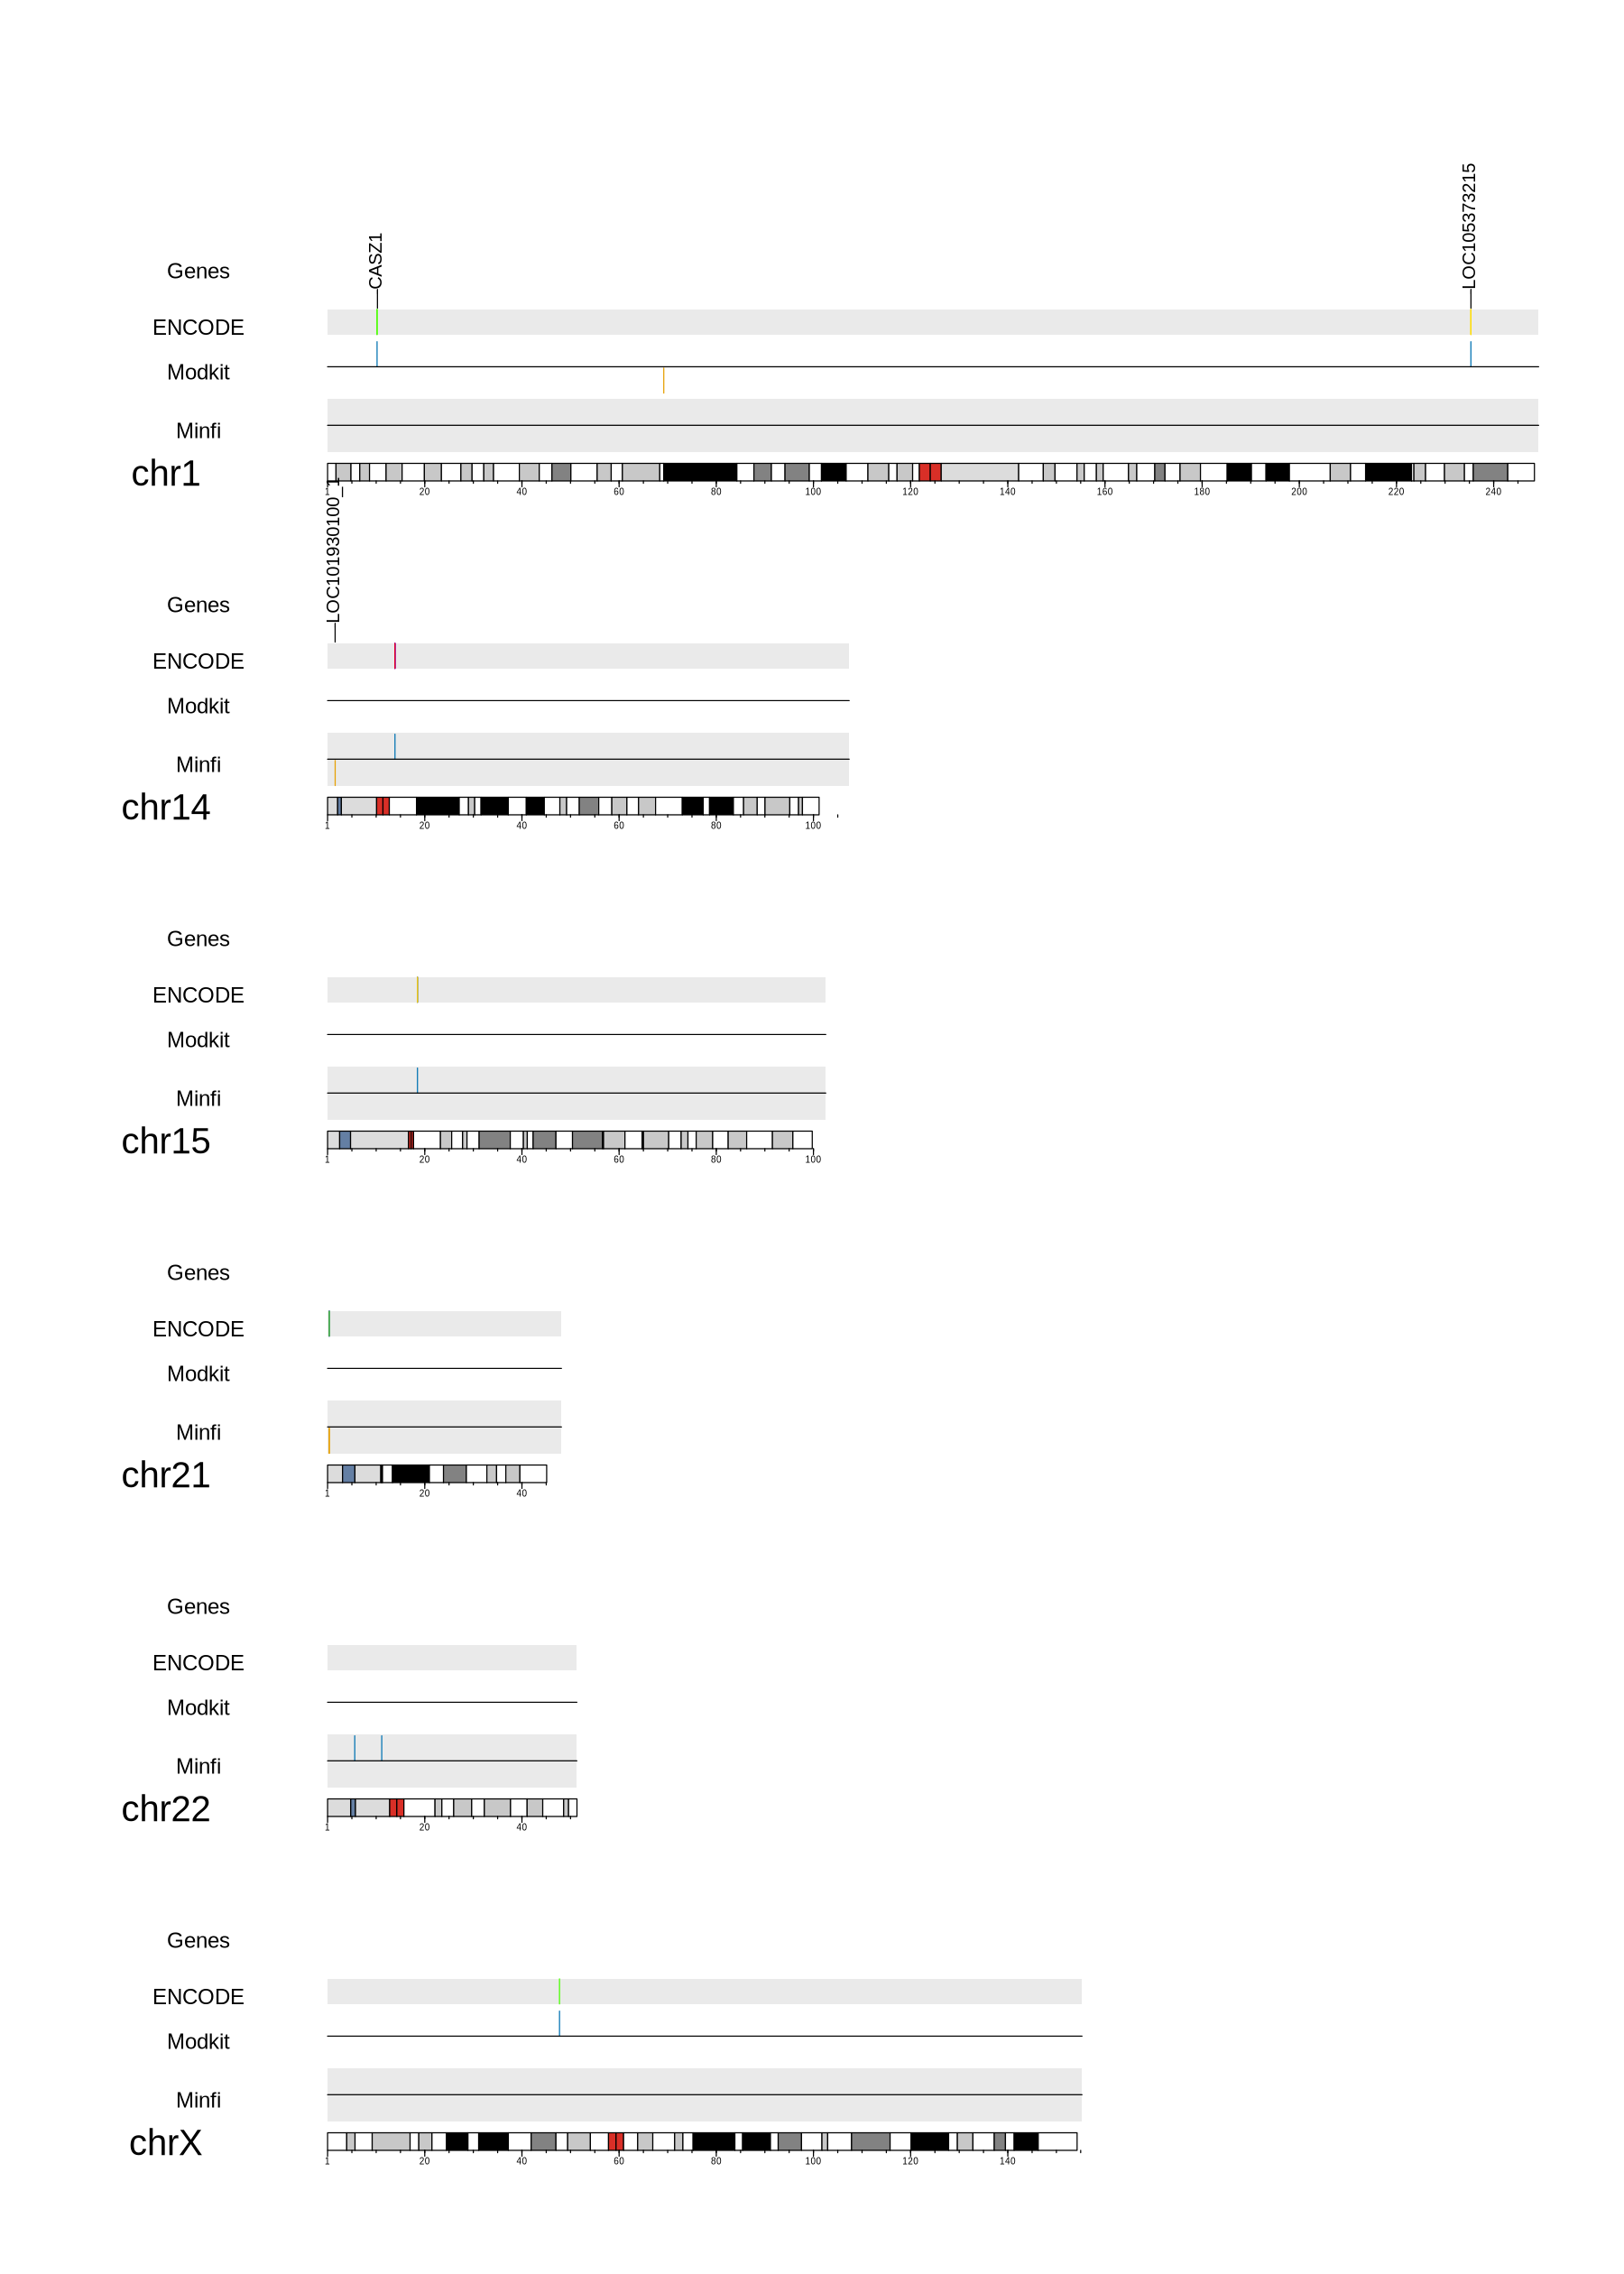

In [34]:
name_of_test = 'CpG_DMRs'

rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.SW780.Rdata')
load(file = rdata_fn)

# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)

In [35]:
# Print data to talk about
gene_list = my_topgenes_gr$gene_id
LOC_genes = gene_list[grepl("^LOC", gene_list)]
named_genes = gene_list[!grepl("^LOC", gene_list)]
LOFF_genes = named_genes[grepl("^LOFF", named_genes)]
named_genes = named_genes[!grepl("^LOFF", named_genes)]
LINC_genes = named_genes[grepl("^LINC", named_genes)]
named_genes = named_genes[!grepl("^LINC", named_genes)]


encode_list = encode_gr$bind_type
CTCF_binding = encode_list[grepl("CTCF", encode_list)]
H3K27ac_binding = encode_list[grepl("H3K27ac", encode_list)]
H3K27me3_binding = encode_list[grepl("H3K27me3", encode_list)]
H3K36me3_binding = encode_list[grepl("H3K36me3", encode_list)]
H3K4me1_binding = encode_list[grepl("H3K4me1", encode_list)]
H3K9me3_binding = encode_list[grepl("H3K9me3", encode_list)]
H3K4me3_binding = encode_list[grepl("H3K4me3", encode_list)]

print('------------')
print("Number of all genes")
print(length(gene_list))
print("Number of LOC genes")
print(length(LOC_genes))
print("Number of LOFF genes")
print(length(LOFF_genes))
print("Number of LINC genes")
print(length(LINC_genes))
print("Number of named genes")
print(length(named_genes))
print("Number of all binding sites")
print(length(encode_list))
print("Number of CTCF binding sites")
print(length(CTCF_binding))
print("Number of H3K27ac binding sites")
print(length(H3K27ac_binding))
print("Number of H3K27me3 binding sites")
print(length(H3K27me3_binding))
print("Number of H3K36me3 binding sites")
print(length(H3K36me3_binding))
print("Number of H3K4me1 binding sites")
print(length(H3K4me1_binding))
print("Number of H3K9me3 binding sites")
print(length(H3K9me3_binding))
print("Number of H3K4me3 binding sites")
print(length(H3K4me3_binding))


[1] "------------"
[1] "Number of all genes"
[1] 3
[1] "Number of LOC genes"
[1] 2
[1] "Number of LOFF genes"
[1] 0
[1] "Number of LINC genes"
[1] 0
[1] "Number of named genes"
[1] 1
[1] "Number of all binding sites"
[1] 14
[1] "Number of CTCF binding sites"
[1] 1
[1] "Number of H3K27ac binding sites"
[1] 3
[1] "Number of H3K27me3 binding sites"
[1] 5


[1] "Number of H3K36me3 binding sites"
[1] 0
[1] "Number of H3K4me1 binding sites"
[1] 0
[1] "Number of H3K9me3 binding sites"
[1] 5
[1] "Number of H3K4me3 binding sites"
[1] 0


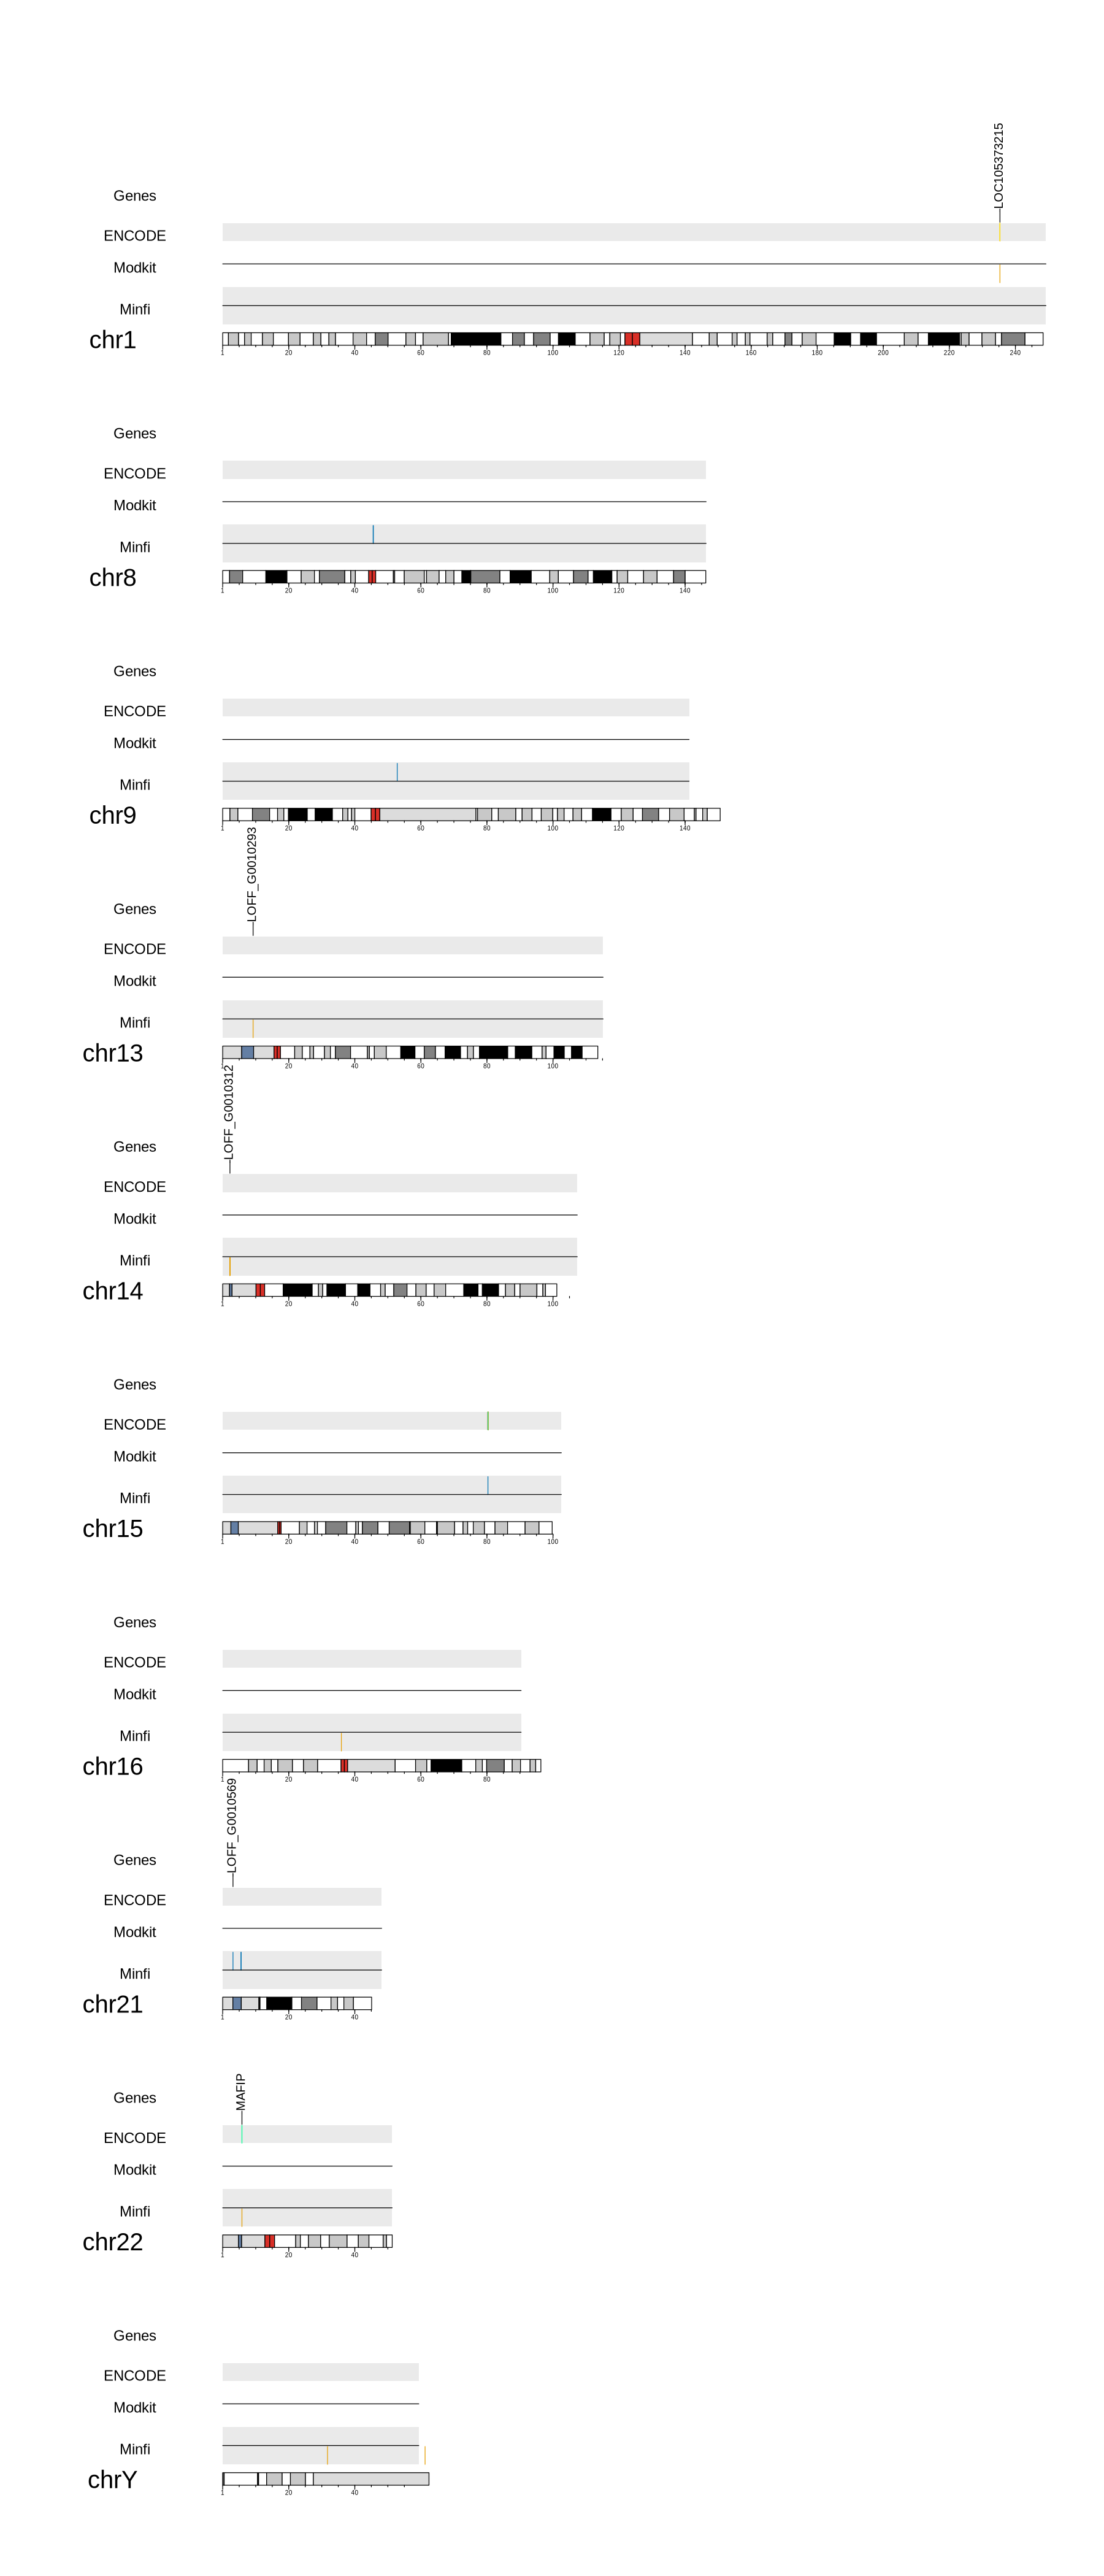

In [39]:
name_of_test = 'CpG_DMRs'

rdata_fn = paste0(path2_output, 'karyoplotting_vars.', name_of_test, '.RT4.Rdata')
load(file = rdata_fn)

# Set plot size based on chromosomes
options(repr.plot.width = 15.0, repr.plot.height = num_chr*3.5)

plot_karyoplot_for_BEBIC_test(ideogram_gr, minfi_upDMP_gr, minfi_downDMP_gr, modkit_upDMP_gr, modkit_downDMP_gr, encode_gr, region_colours, my_topgenes_gr, genes_txdb, chroms)

In [40]:
# Print data to talk about
gene_list = my_topgenes_gr$gene_id
LOC_genes = gene_list[grepl("^LOC", gene_list)]
named_genes = gene_list[!grepl("^LOC", gene_list)]
LOFF_genes = named_genes[grepl("^LOFF", named_genes)]
named_genes = named_genes[!grepl("^LOFF", named_genes)]
LINC_genes = named_genes[grepl("^LINC", named_genes)]
named_genes = named_genes[!grepl("^LINC", named_genes)]


encode_list = encode_gr$bind_type
CTCF_binding = encode_list[grepl("CTCF", encode_list)]
H3K27ac_binding = encode_list[grepl("H3K27ac", encode_list)]
H3K27me3_binding = encode_list[grepl("H3K27me3", encode_list)]
H3K36me3_binding = encode_list[grepl("H3K36me3", encode_list)]
H3K4me1_binding = encode_list[grepl("H3K4me1", encode_list)]
H3K9me3_binding = encode_list[grepl("H3K9me3", encode_list)]
H3K4me3_binding = encode_list[grepl("H3K4me3", encode_list)]

print('------------')
print("Number of all genes")
print(length(gene_list))
print("Number of LOC genes")
print(length(LOC_genes))
print("Number of LOFF genes")
print(length(LOFF_genes))
print("Number of LINC genes")
print(length(LINC_genes))
print("Number of named genes")
print(length(named_genes))
print("Number of all binding sites")
print(length(encode_list))
print("Number of CTCF binding sites")
print(length(CTCF_binding))
print("Number of H3K27ac binding sites")
print(length(H3K27ac_binding))
print("Number of H3K27me3 binding sites")
print(length(H3K27me3_binding))
print("Number of H3K36me3 binding sites")
print(length(H3K36me3_binding))
print("Number of H3K4me1 binding sites")
print(length(H3K4me1_binding))
print("Number of H3K9me3 binding sites")
print(length(H3K9me3_binding))
print("Number of H3K4me3 binding sites")
print(length(H3K4me3_binding))


[1] "------------"
[1] "Number of all genes"
[1] 5
[1] "Number of LOC genes"
[1] 1
[1] "Number of LOFF genes"
[1] 3
[1] "Number of LINC genes"
[1] 0
[1] "Number of named genes"
[1] 1
[1] "Number of all binding sites"
[1] 21
[1] "Number of CTCF binding sites"
[1] 5


[1] "Number of H3K27ac binding sites"
[1] 9
[1] "Number of H3K27me3 binding sites"
[1] 0
[1] "Number of H3K36me3 binding sites"
[1] 2
[1] "Number of H3K4me1 binding sites"
[1] 1
[1] "Number of H3K9me3 binding sites"
[1] 0
[1] "Number of H3K4me3 binding sites"
[1] 4


## Hold on a tick
Bebics need to be separated into SW780 and RT4 for the karyoplot


In [42]:
# Load modkit and minfi data for the test
modkit_DMP_name = "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/all_DMRs.modkit.annotated.csv"
minfi_DMP_name = "/home/dejlu879/20240731-BEBIC_dmr/CpG_DMRs/all_DMRs.minfi.annotated.csv"
modkit_DMP_data = fread(modkit_DMP_name)
minfi_DMP_data = fread(minfi_DMP_name)
modkit_DMP_data = rename(modkit_DMP_data, balanced_effect_size = effect_size)
minfi_DMP_data = rename(minfi_DMP_data, balanced_effect_size = effect_size, score = areaStat)

In [43]:
modkit_DMP_data_SW = filter(modkit_DMP_data, cell.line == "SW780")
modkit_DMP_data_RT = filter(modkit_DMP_data, cell.line == "RT4")
modkit_DMP_data[, 10:25]
modkit_DMP_data_SW[, 5:25]
modkit_DMP_data_RT[, 5:25]

score,N_sites,samplea_counts,sampleb_counts,samplea_percents,sampleb_percents,samplea_fraction_modified,sampleb_fraction_modified,balanced_effect_size,testID,test_description,cell.line,gene_id,gene_id_strand,gene_description,EntrezID
<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
568.83889,18,m:676,m:739,m:30.94,m:96.22,0.3093821,0.9622396,-0.6528574,test2,BEBIC_B: C of CpG,SW780,CASZ1,-,castor zinc finger 1,54897
16.65014,1,m:28,m:5,m:96.55,m:22.73,0.9655172,0.2272727,0.7382445,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA
118.52028,10,m:664,m:794,m:28.49,m:53.40,0.2848563,0.5339610,-0.2491047,test2,BEBIC_B: C of CpG,SW780,LOC105373215,+,uncharacterized LOC105373215,105373215
30.95678,3,m:12,m:56,m:16.44,m:80.00,0.1643836,0.8000000,-0.6356164,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA
140.44648,9,m:169,m:354,m:86.22,m:25.04,0.8622449,0.2503536,0.6118913,test6,BEBIC_C: C of CpG,RT4,LOC105373215,+,uncharacterized LOC105373215,105373215


width,strand,location,location.1,state_name,score,N_sites,samplea_counts,sampleb_counts,samplea_percents,⋯,samplea_fraction_modified,sampleb_fraction_modified,balanced_effect_size,testID,test_description,cell.line,gene_id,gene_id_strand,gene_description,EntrezID
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
71,*,chr1:10182679-10182749,chr1:10182679-10182749,different,568.83889,18,m:676,m:739,m:30.94,⋯,0.3093821,0.9622396,-0.6528574,test2,BEBIC_B: C of CpG,SW780,CASZ1,-,castor zinc finger 1,54897
2,*,chr1:69193116-69193117,chr1:69193116-69193117,different,16.65014,1,m:28,m:5,m:96.55,⋯,0.9655172,0.2272727,0.7382445,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA
29,*,chr1:235312394-235312422,chr1:235312394-235312422,different,118.52028,10,m:664,m:794,m:28.49,⋯,0.2848563,0.5339610,-0.2491047,test2,BEBIC_B: C of CpG,SW780,LOC105373215,+,uncharacterized LOC105373215,105373215
17,*,chrX:47736633-47736649,chrX:47736633-47736649,different,30.95678,3,m:12,m:56,m:16.44,⋯,0.1643836,0.8000000,-0.6356164,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA


width,strand,location,location.1,state_name,score,N_sites,samplea_counts,sampleb_counts,samplea_percents,⋯,samplea_fraction_modified,sampleb_fraction_modified,balanced_effect_size,testID,test_description,cell.line,gene_id,gene_id_strand,gene_description,EntrezID
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
32,*,chr1:235312391-235312422,chr1:235312391-235312422,different,140.4465,9,m:169,m:354,m:86.22,⋯,0.8622449,0.2503536,0.6118913,test6,BEBIC_C: C of CpG,RT4,LOC105373215,+,uncharacterized LOC105373215,105373215


In [32]:
minfi_DMP_data[, 10:20]

sampleb_percents,balanced_effect_size,score,location,testID,test_description,cell.line,gene_id,gene_id_strand,gene_description,EntrezID
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
0.49080387,0.08949149,18.767999,chr22:5592508-5592571,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA
0.06968699,0.12931723,10.346580,chr22:11147191-11147541,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA
0.43589589,-0.16553395,-10.299742,chr21:351253-351769,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA
0.27111037,0.15325841,9.715131,chr15:18498645-18500285,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA
0.44508870,-0.12969969,-8.292057,chr21:344007-344156,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA
0.78114570,-0.08899187,-6.475291,chr14:1561527-1561585,test2,BEBIC_B: C of CpG,SW780,LOC101930100_1,+,NA,NA
0.24734200,0.08150531,3.894828,chr14:13868824-13868992,test2,BEBIC_B: C of CpG,SW780,NA,NA,NA,NA
0.81618114,-0.19974287,-95.257730,chr14:2194090-2195630,test6,BEBIC_C: C of CpG,RT4,LOFF_G0010312,+,rRNA,NA
0.78896051,-0.14574559,-45.627653,chr14:2193506-2193711,test6,BEBIC_C: C of CpG,RT4,LOFF_G0010312,+,rRNA,NA
